In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None  # default='warn'


## Create dataframes from the excel file


In [2]:
df_diesel = pd.read_excel('auto.bg.xlsx', sheet_name="Diesel engines")
df_diesel.drop(columns=df_diesel.columns[0], axis=1, inplace=True)
df_diesel.head()

,Model,Year Manifacture,Years Automobile,Price BGN,Kilometers,Engine Type,Horsepower
0,Alpina D3 Biturbo,2009,13,19000.0,203600,Дизел,214.0
1,Alpina XD3 biturbo,2015,7,74000.0,131000,Дизел,350.0
2,Audi A4 1.9,2001,21,4800.0,240000,Дизел,131.0
3,Audi A4 2.0TDI,2012,10,19650.0,132000,Дизел,120.0
4,Audi A4 3.0TDI Avant,2013,9,37500.0,309072,Дизел,245.0


In [3]:
df_gasoline = pd.read_excel('auto.bg.xlsx', sheet_name="Gasoline engines")
df_gasoline.drop(columns=df_gasoline.columns[0], axis=1, inplace=True)
df_gasoline.head()

,Model,Year Manifacture,Years Automobile,Price BGN,Kilometers,Engine Type,Horsepower
0,Abarth 124,2020,2,250000.0,11111,Бензин,NaN
1,Abarth 595 595 PISTA 19000km,2020,2,39999.0,19000,Бензин,165.0
2,Abarth 595,2019,3,45800.0,54350,Бензин,181.0
3,Abarth 595 Pista,2017,5,36000.0,45000,Бензин,165.0
4,Abarth 595,2014,8,21800.0,80000,Бензин,165.0


In [4]:
df_electric = pd.read_excel('auto.bg.xlsx', sheet_name="Electric engines")
df_electric.drop(columns=df_electric.columns[0], axis=1, inplace=True)
df_electric.head()

,Model,Year Manifacture,Years Automobile,Price BGN,Kilometers,Engine Type,Horsepower
0,Audi Q4 35/ E-Tron/ MATRIX/ PANORAMA/ NAVI/ LA...,2021,1,109980.0,12500,Електрически,170.0
1,Audi E-Tron SPORTBACK 55/ QUATTRO/ S-LINE/ 360...,2021,1,139980.0,23923,Електрически,408.0
2,Audi E-Tron Audi E-Tron Q4 50quattro sportback,2020,2,131700.0,13200,Електрически,299.0
3,Chevrolet Volt,2017,5,46500.0,119000,Електрически,NaN
4,Chevrolet Volt,2017,5,45000.0,89100,Електрически,150.0


In [5]:
df_hybrid = pd.read_excel('auto.bg.xlsx', sheet_name="Hybrid engines")
df_hybrid.drop(columns=df_hybrid.columns[0], axis=1, inplace=True)
df_hybrid.head()

,Model,Year Manifacture,Years Automobile,Price BGN,Kilometers,Engine Type,Horsepower
0,Audi Q5 2.0 TFSI Hybrid Quattro tiptronic S-LINE,2012,10,31500.0,147000,Хибриден,211.0
1,Audi A6 HYBRID AUTOMATIC EURO 6D,2018,4,62500.0,223000,Хибриден,204.0
2,Audi A3 E - Tron 1.4 Premium,2016,6,45800.0,61400,Plug-in хибрид,204.0
3,Alfa Romeo 156 sportwagon Лъжец,2015,7,1000.0,393932,Хибриден,NaN
4,Bentley Bentayga HYBRID/ FIRST EDITION/ NAIM/ ...,2021,1,440661.0,27630,Хибриден,449.0


## Price Distribution

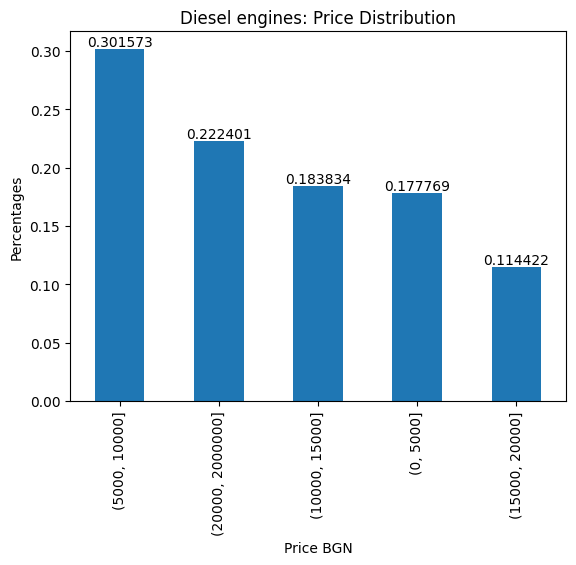

In [51]:
df_diesel["bins"] = pd.cut(df_diesel['Price BGN'], [0,5000,10000,15000,20000,2000000])
ax = df_diesel["bins"].value_counts(normalize=True).plot.bar()
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Price BGN')
plt.ylabel('Percentages')
plt.title("Diesel engines: Price Distribution")
plt.show()

The automobiles between 5 000lv and 10 000lv are the most: 30,2%.
The automobiles up to 5 000 lv are 18%.
More than 50% of the automobiles are above 10 000lv.

In [25]:
df_diesel['Price BGN'].describe()

count     21106.000000
mean      16393.863454
std       19394.353987
min          11.000000
25%        6337.250000
50%       10711.525000
75%       18800.000000
max      327210.000000
Name: Price BGN, dtype: float64

In [29]:
mode_price_d = df_diesel['Price BGN'].mode()
mode_price_d

0    6500.0
Name: Price BGN, dtype: float64

Average Price Diesel cars - 16 393lv.
Median Price Diesel cars - 10 711lv.
Mode Price (the most common value) Diesel cars - 6 500lv.

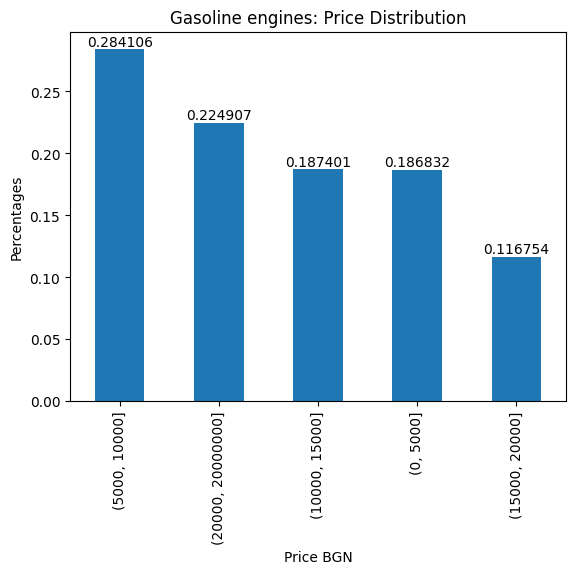

In [50]:
df_gasoline["bins"] = pd.cut(df_diesel['Price BGN'], [0,5000,10000,15000,20000,20000000])
ax = df_gasoline["bins"].value_counts(normalize=True).plot.bar()
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Price BGN')
plt.ylabel('Percentages')
plt.title("Gasoline engines: Price Distribution")
plt.show()

The automobiles between 5 000lv and 10 000lv are the most: 28%.
The automobiles up to 5 000 lv are 19%.
More than 50% of the automobiles are above 10 000lv.

In [35]:
df_gasoline['Price BGN'].mean()

24496.398014463335

In [33]:
mode_price_g = df_gasoline['Price BGN'].mode()
mode_price_g

0    6500.0
Name: Price BGN, dtype: float64

In [36]:
df_gasoline['Price BGN'].median()

10000.0

Average Price Gasoline cars - 24 490lv.
Median Price Gasoline cars - 10 000lv.
Mode Price (the most common value) Gasoline cars - 6 500lv.

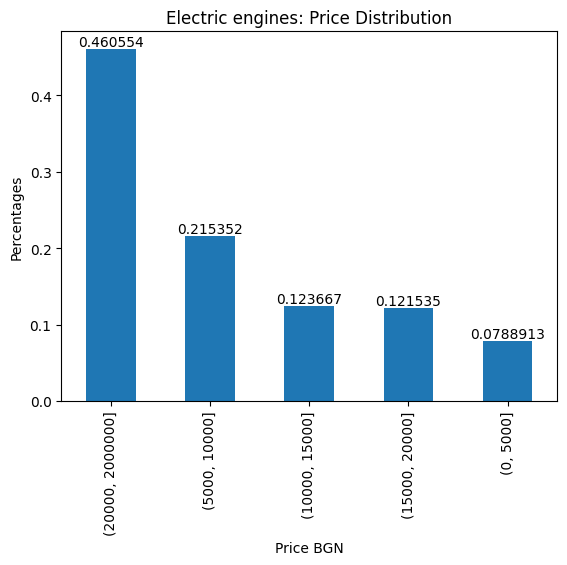

In [49]:
df_electric["bins"] = pd.cut(df_diesel['Price BGN'], [0,5000,10000,15000,20000,2000000])
ax = df_electric["bins"].value_counts(normalize=True).plot.bar()
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Price BGN')
plt.ylabel('Percentages')
plt.title("Electric engines: Price Distribution")
plt.show()

The most cars with Electric engines are above 20 000lv.
At least cars with Electric engines are below 5 000lv.

In [41]:
df_electric['Price BGN'].mean()

74410.6046236559

In [43]:
df_electric['Price BGN'].median()

59988.0

In [44]:
df_electric['Price BGN'].mode()

0    17500.0
Name: Price BGN, dtype: float64

Average price: 74 410lv.
Median price: 60 000lv.
The most common price: 17 500lv.
The cars with Electric Engines have the highest average and median price.

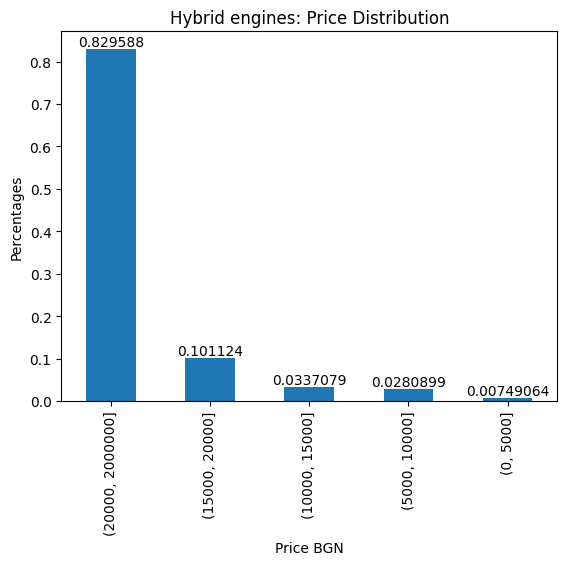

In [48]:
df_hybrid["bins"] = pd.cut(df_hybrid['Price BGN'], [0,5000,10000,15000,20000,2000000])
ax = df_hybrid["bins"].value_counts(normalize=True).plot.bar()
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Price BGN')
plt.ylabel('Percentages')
plt.title("Hybrid engines: Price Distribution")
plt.show()

More than 80% of the cars with Hybrid egines are above 20 000. 

In [45]:
df_hybrid["Price BGN"].mean()

51568.933426966294

In [46]:
df_hybrid["Price BGN"].median()

39599.5

In [47]:
df_hybrid["Price BGN"].mode()

0    39900.0
Name: Price BGN, dtype: float64

Average price: 51 568lv.
Median price: 39 600lv.
The most common price: 39 900lv.

## Kilometers distribution

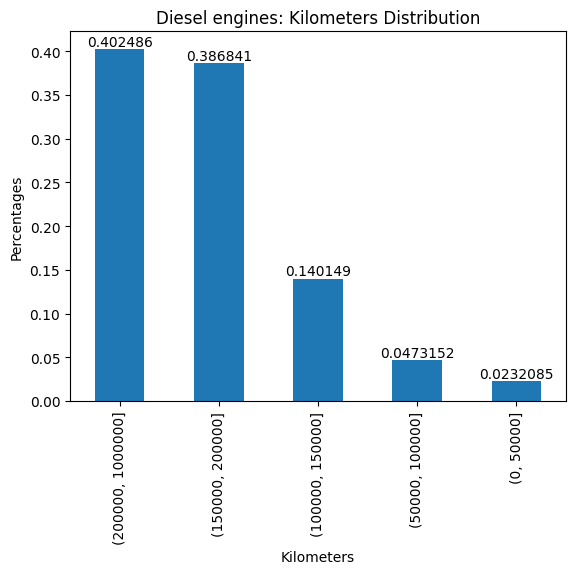

In [53]:
df_diesel["bins_km"] = pd.cut(df_diesel['Kilometers'], [0,50000,100000,150000,200000,1000000])
ax = df_diesel["bins_km"].value_counts(normalize=True).plot.bar()
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Kilometers')
plt.ylabel('Percentages')
plt.title("Diesel engines: Kilometers Distribution")
plt.show()

78% of the cars with Diesel engines are over 150 000km.
Only 7% of the cars with Diesel engines are under 100 000km.

In [55]:
df_diesel['Kilometers'].mean()

197471.79509046362

In [57]:
df_diesel['Kilometers'].median()

190000.0

In [56]:
df_diesel['Kilometers'].mode()

0    200000
Name: Kilometers, dtype: int64

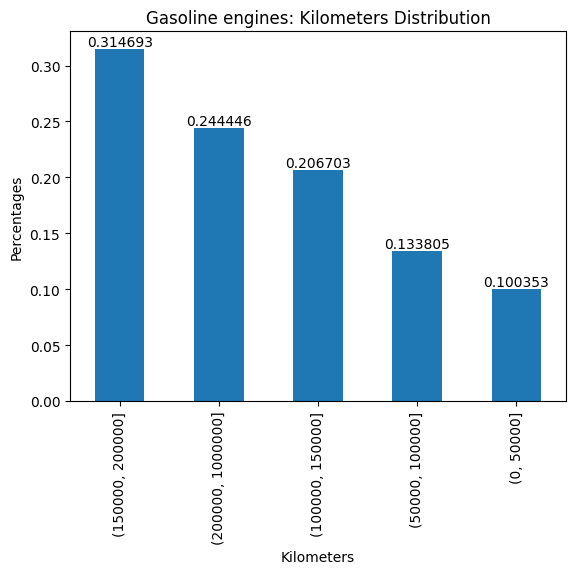

In [58]:
df_gasoline["bins_km"] = pd.cut(df_gasoline['Kilometers'], [0,50000,100000,150000,200000,1000000])
ax = df_gasoline["bins_km"].value_counts(normalize=True).plot.bar()
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Kilometers')
plt.ylabel('Percentages')
plt.title("Gasoline engines: Kilometers Distribution")
plt.show()

More than 55% of the cars with Gasoline engines are over 150 000km.
More than 75% of the cars with Gasoline engines are over 100 000km.

In [59]:
df_gasoline['Kilometers'].mean()

164712.13211343772

In [60]:
df_gasoline['Kilometers'].median()

161000.0

In [61]:
df_gasoline['Kilometers'].mode()

0    200000
Name: Kilometers, dtype: int64

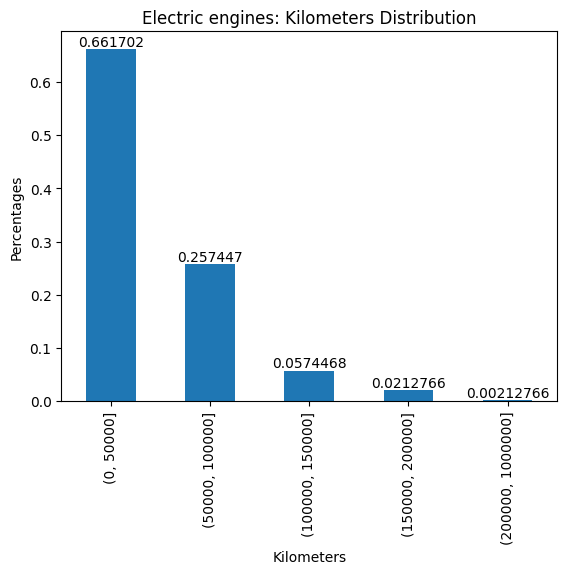

In [62]:
df_electric["bins_km"] = pd.cut(df_electric['Kilometers'], [0,50000,100000,150000,200000,1000000])
ax = df_electric["bins_km"].value_counts(normalize=True).plot.bar()
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Kilometers')
plt.ylabel('Percentages')
plt.title("Electric engines: Kilometers Distribution")
plt.show()

66% of the all cars with Electric engines are under 5 000km.
Only 8% of the all cars with Electric engines are above 100 000km.
The most cars with Electric engines are almost new.

In [64]:
df_electric['Kilometers'].mean()

44367.76382978723

In [65]:
df_electric['Kilometers'].median()

31451.0

In [66]:
df_electric['Kilometers'].mode()

0     6000
1    25000
Name: Kilometers, dtype: int64

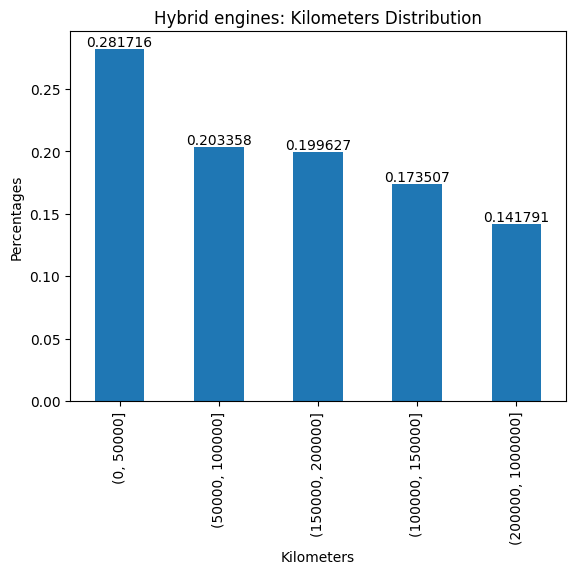

In [63]:
df_hybrid["bins_km"] = pd.cut(df_hybrid['Kilometers'], [0,50000,100000,150000,200000,1000000])
ax = df_hybrid["bins_km"].value_counts(normalize=True).plot.bar()
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Kilometers')
plt.ylabel('Percentages')
plt.title("Hybrid engines: Kilometers Distribution")
plt.show()

More than 70% of the all cars with Hybrid engines are over 50 000km.

In [67]:
df_hybrid['Kilometers'].mean()

113082.57462686567

In [68]:
df_hybrid['Kilometers'].median()

103000.0

In [69]:
df_hybrid['Kilometers'].mode()

0    180000
1    240000
Name: Kilometers, dtype: int64

## Years_Automobile distribution

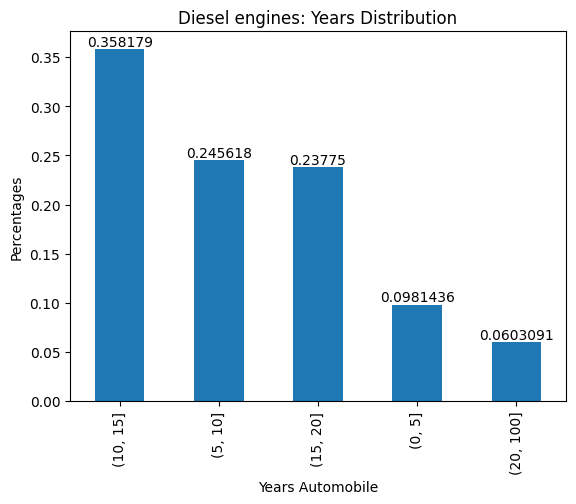

In [84]:
df_diesel["bins_years"] = pd.cut(df_diesel['Years Automobile'], [0,5,10,15,20,100])
ax = df_diesel["bins_years"].value_counts(normalize=True).plot.bar()
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Years Automobile')
plt.ylabel('Percentages')
plt.title("Diesel engines: Years Distribution")
plt.show()

Around 65% of the all cars with Diesel engines are more than 10 years old.
Only 10% are up to 5 years old.

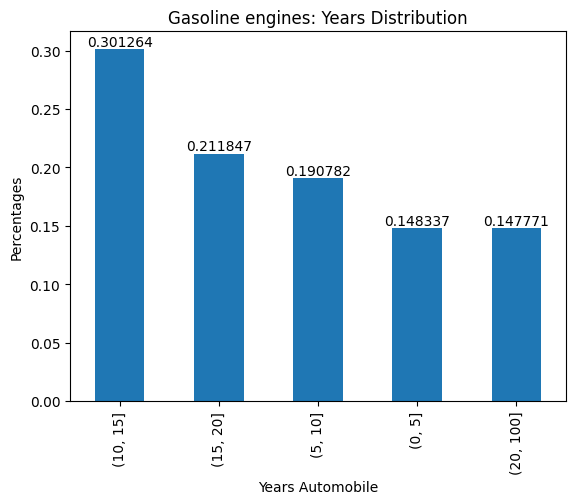

In [85]:
df_gasoline["bins_years"] = pd.cut(df_gasoline['Years Automobile'], [0,5,10,15,20,100])
ax = df_gasoline["bins_years"].value_counts(normalize=True).plot.bar()
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Years Automobile')
plt.ylabel('Percentages')
plt.title("Gasoline engines: Years Distribution")
plt.show()

More than 65% of the all cars with Gasoline engines are above 10 years old.

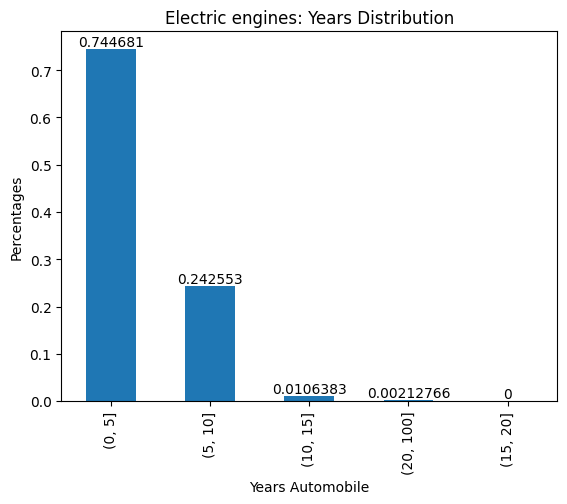

In [82]:
df_electric["bins_years"] = pd.cut(df_electric['Years Automobile'], [0,5,10,15,20,100])
ax = df_electric["bins_years"].value_counts(normalize=True).plot.bar()
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Years Automobile')
plt.ylabel('Percentages')
plt.title("Electric engines: Years Distribution")
plt.show()

Around 74% of the all cars with electric engines are under 5 years old.
The latest cars are from this group.

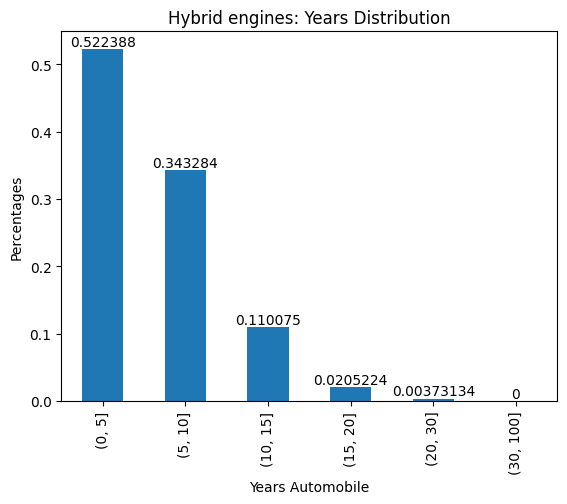

In [79]:
df_hybrid["bins_years"] = pd.cut(df_hybrid['Years Automobile'], [0,5,10,15,20,30,100])
ax = df_hybrid["bins_years"].value_counts(normalize=True).plot.bar()
ax.bar_label(ax.containers[0], label_type='edge')
plt.xlabel('Years Automobile')
plt.ylabel('Percentages')
plt.title("Hybrid engines: Years Distribution")
plt.show()

Around 65% of the all cars with Hybrid engines are under 10 years old.

## Correlation Analysis

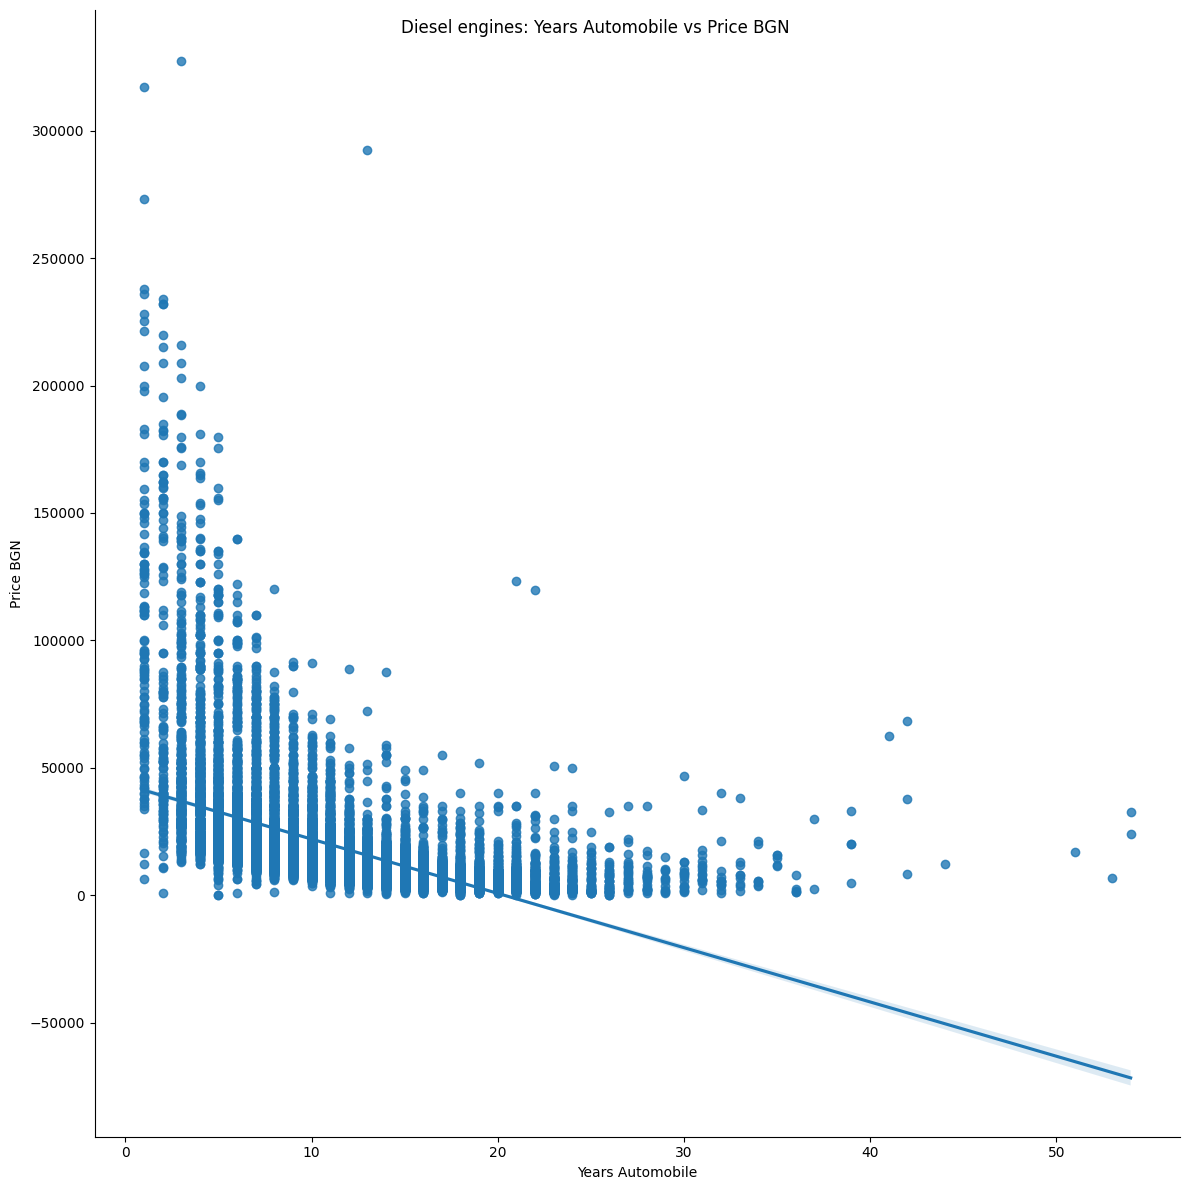

In [126]:
df_no_nulls_diesel = df_diesel[["Years Automobile", "Price BGN", "Kilometers", "Horsepower"]].dropna()
g = sns.lmplot(x = "Years Automobile", y = "Price BGN", data = df_no_nulls_diesel, height=12, aspect=1)
g.fig.suptitle('Diesel engines: Years Automobile vs Price BGN')
plt.show()

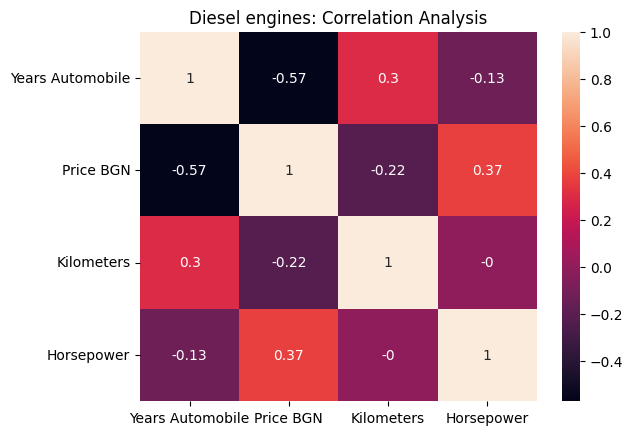

In [118]:
g = sns.heatmap(np.round(df_no_nulls_diesel.corr(), 2), annot = True).set(title='Diesel engines: Correlation Analysis')
g
plt.show()

No strong correlations were observed. 
The most expressed is the correlation between Years Automobile and Price which is negative ( -0.57).

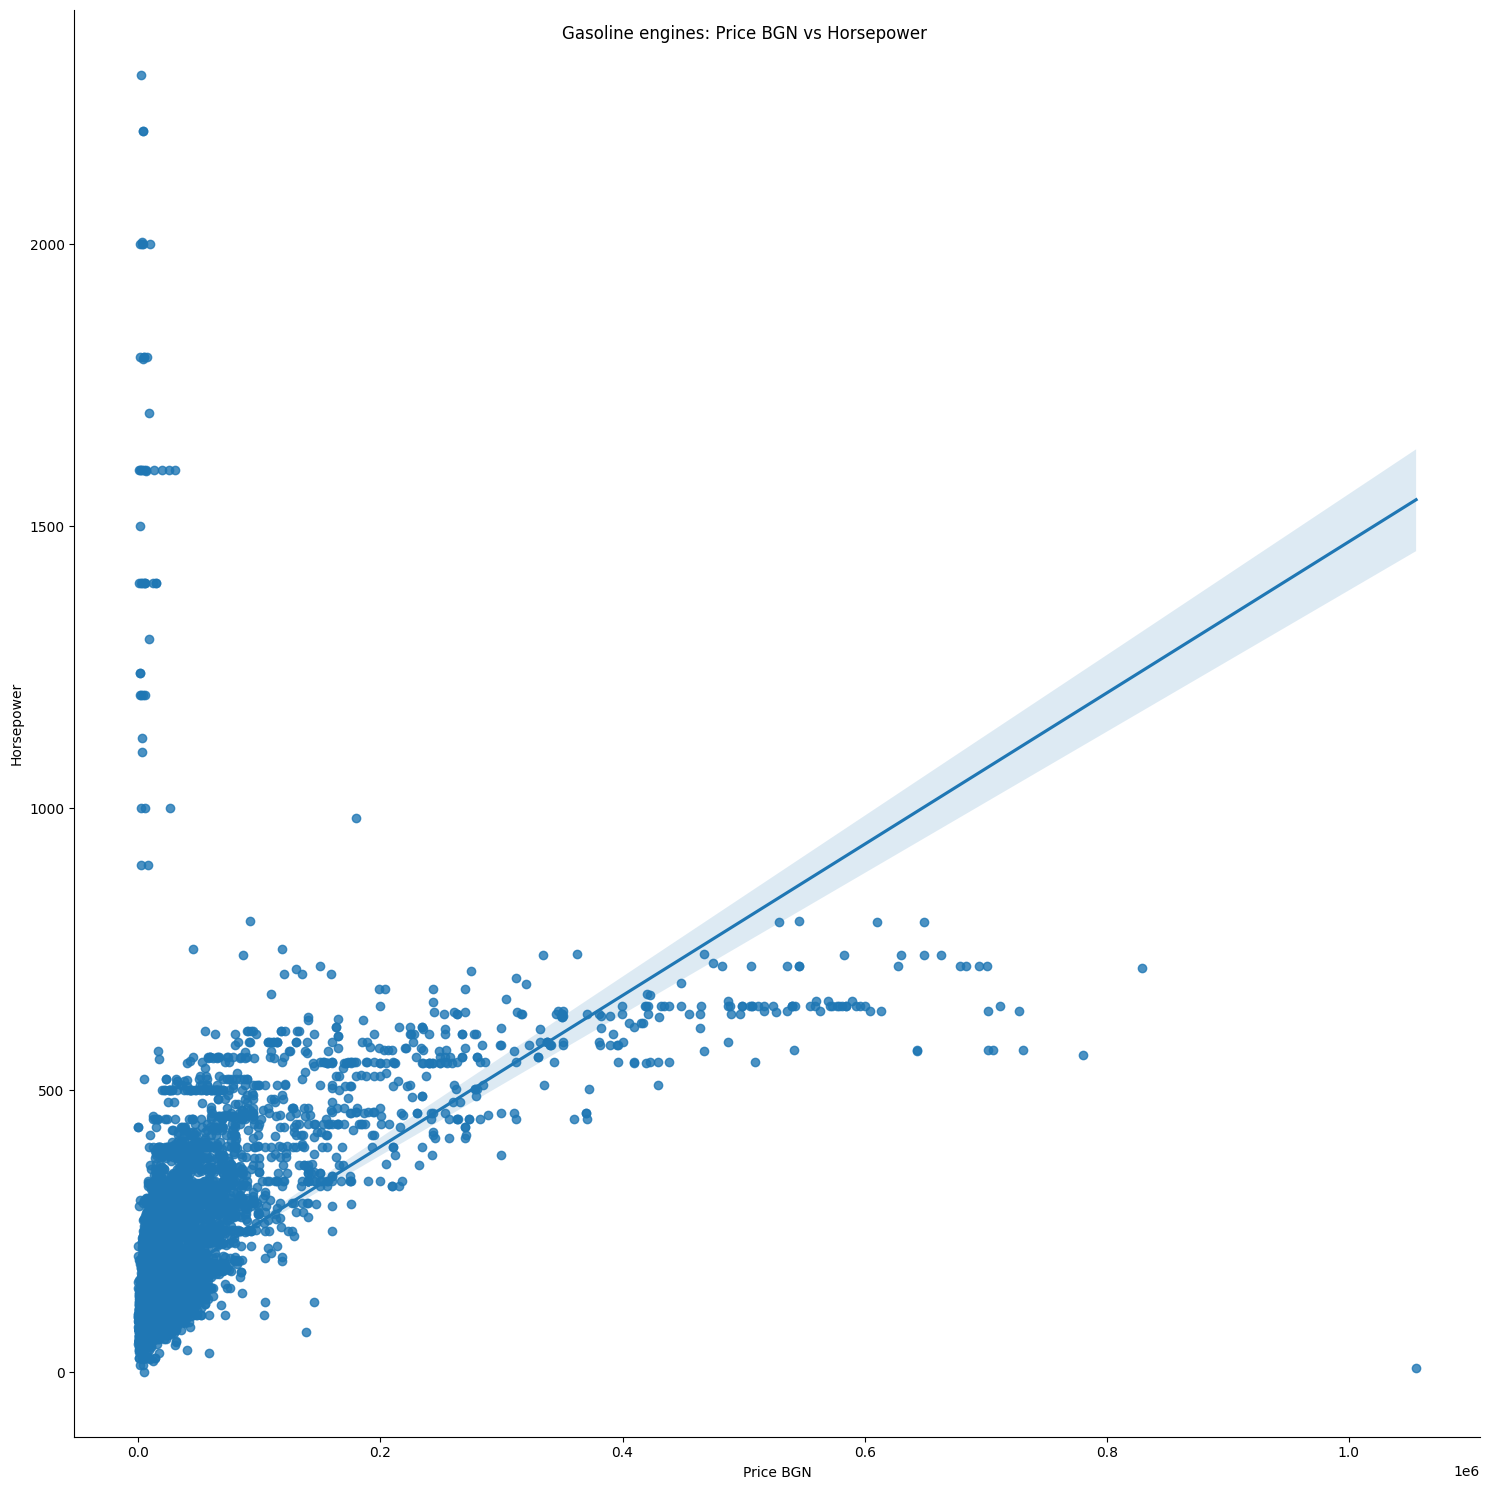

In [136]:
df_no_nulls_gasoline = df_gasoline[["Years Automobile", "Price BGN", "Kilometers", "Horsepower"]].dropna()
g = sns.lmplot(x = "Price BGN", y = "Horsepower", data = df_no_nulls_gasoline, height=15, aspect=1)
g.fig.suptitle('Gasoline engines: Price BGN vs Horsepower')
plt.show()

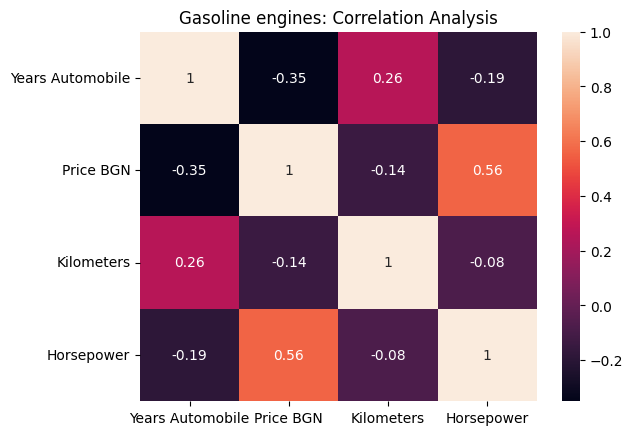

In [129]:
g = sns.heatmap(np.round(df_no_nulls_gasoline.corr(), 2), annot = True).set(title='Gasoline engines: Correlation Analysis')
g
plt.show()

No strong correlations were observed. 
The most expressed is the correlation between Price and Horsepower which is positive (0.56).

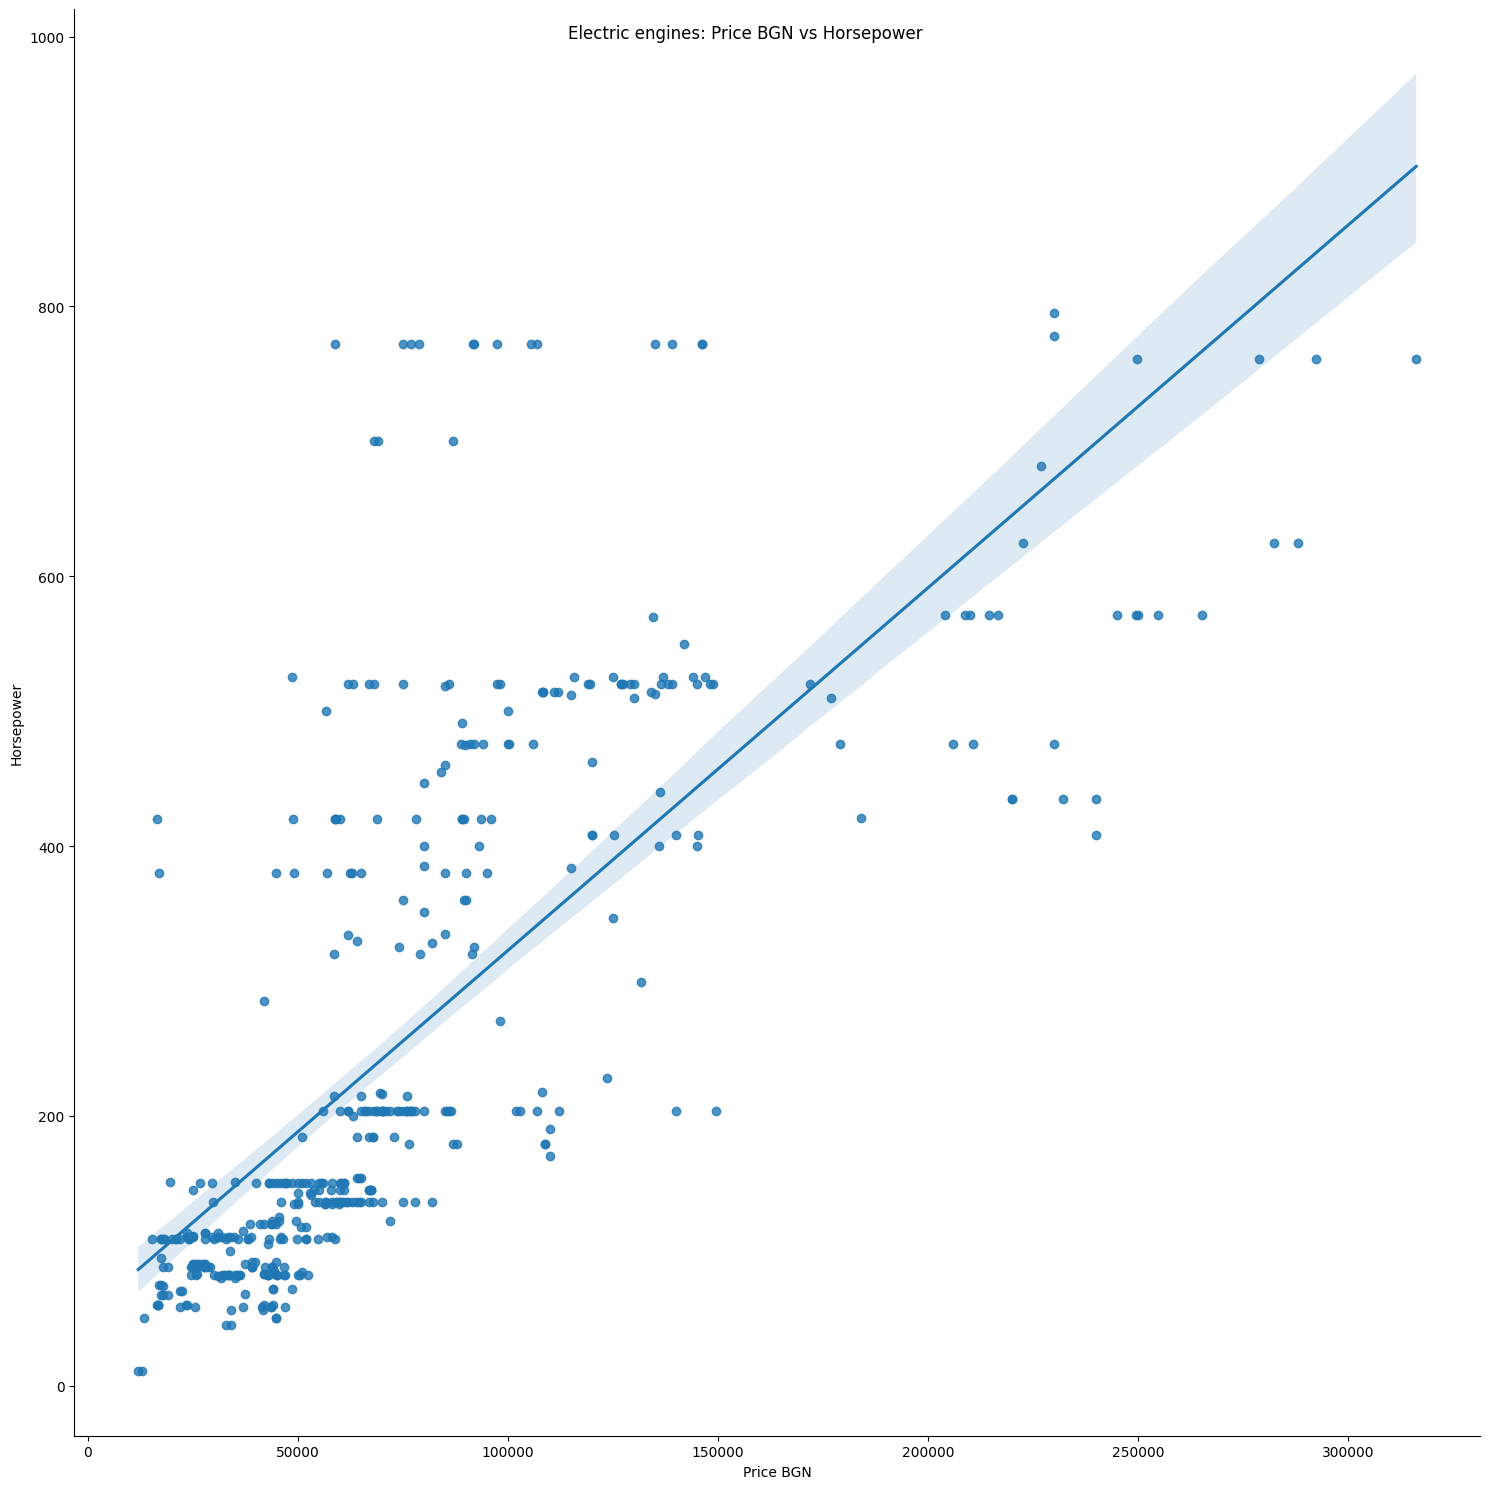

In [137]:
df_no_nulls_electric = df_electric[["Years Automobile", "Price BGN", "Kilometers", "Horsepower"]].dropna()
g = sns.lmplot(x = "Price BGN", y = "Horsepower", data = df_no_nulls_electric, height=15, aspect=1)
g.fig.suptitle('Electric engines: Price BGN vs Horsepower')
plt.show()

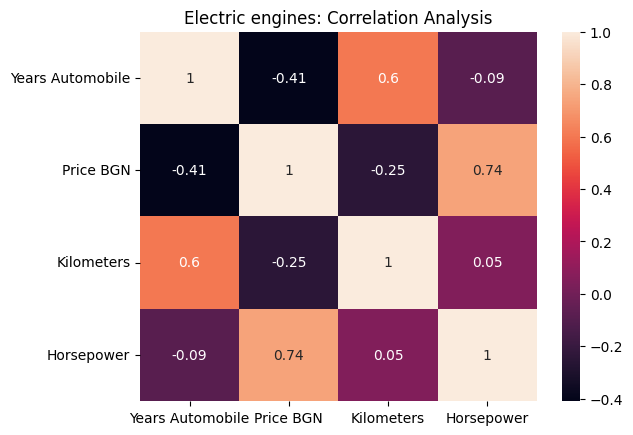

In [138]:
g = sns.heatmap(np.round(df_no_nulls_electric.corr(), 2), annot = True).set(title='Electric engines: Correlation Analysis')
g
plt.show()

The most expressed is the correlation between Price BGN and Horsepower in this group with Hybrid engines (0.74).
The positive correlation between Years Automobile and Kilometers is more expressed than the first two groups (diesel and gasoline engines). 

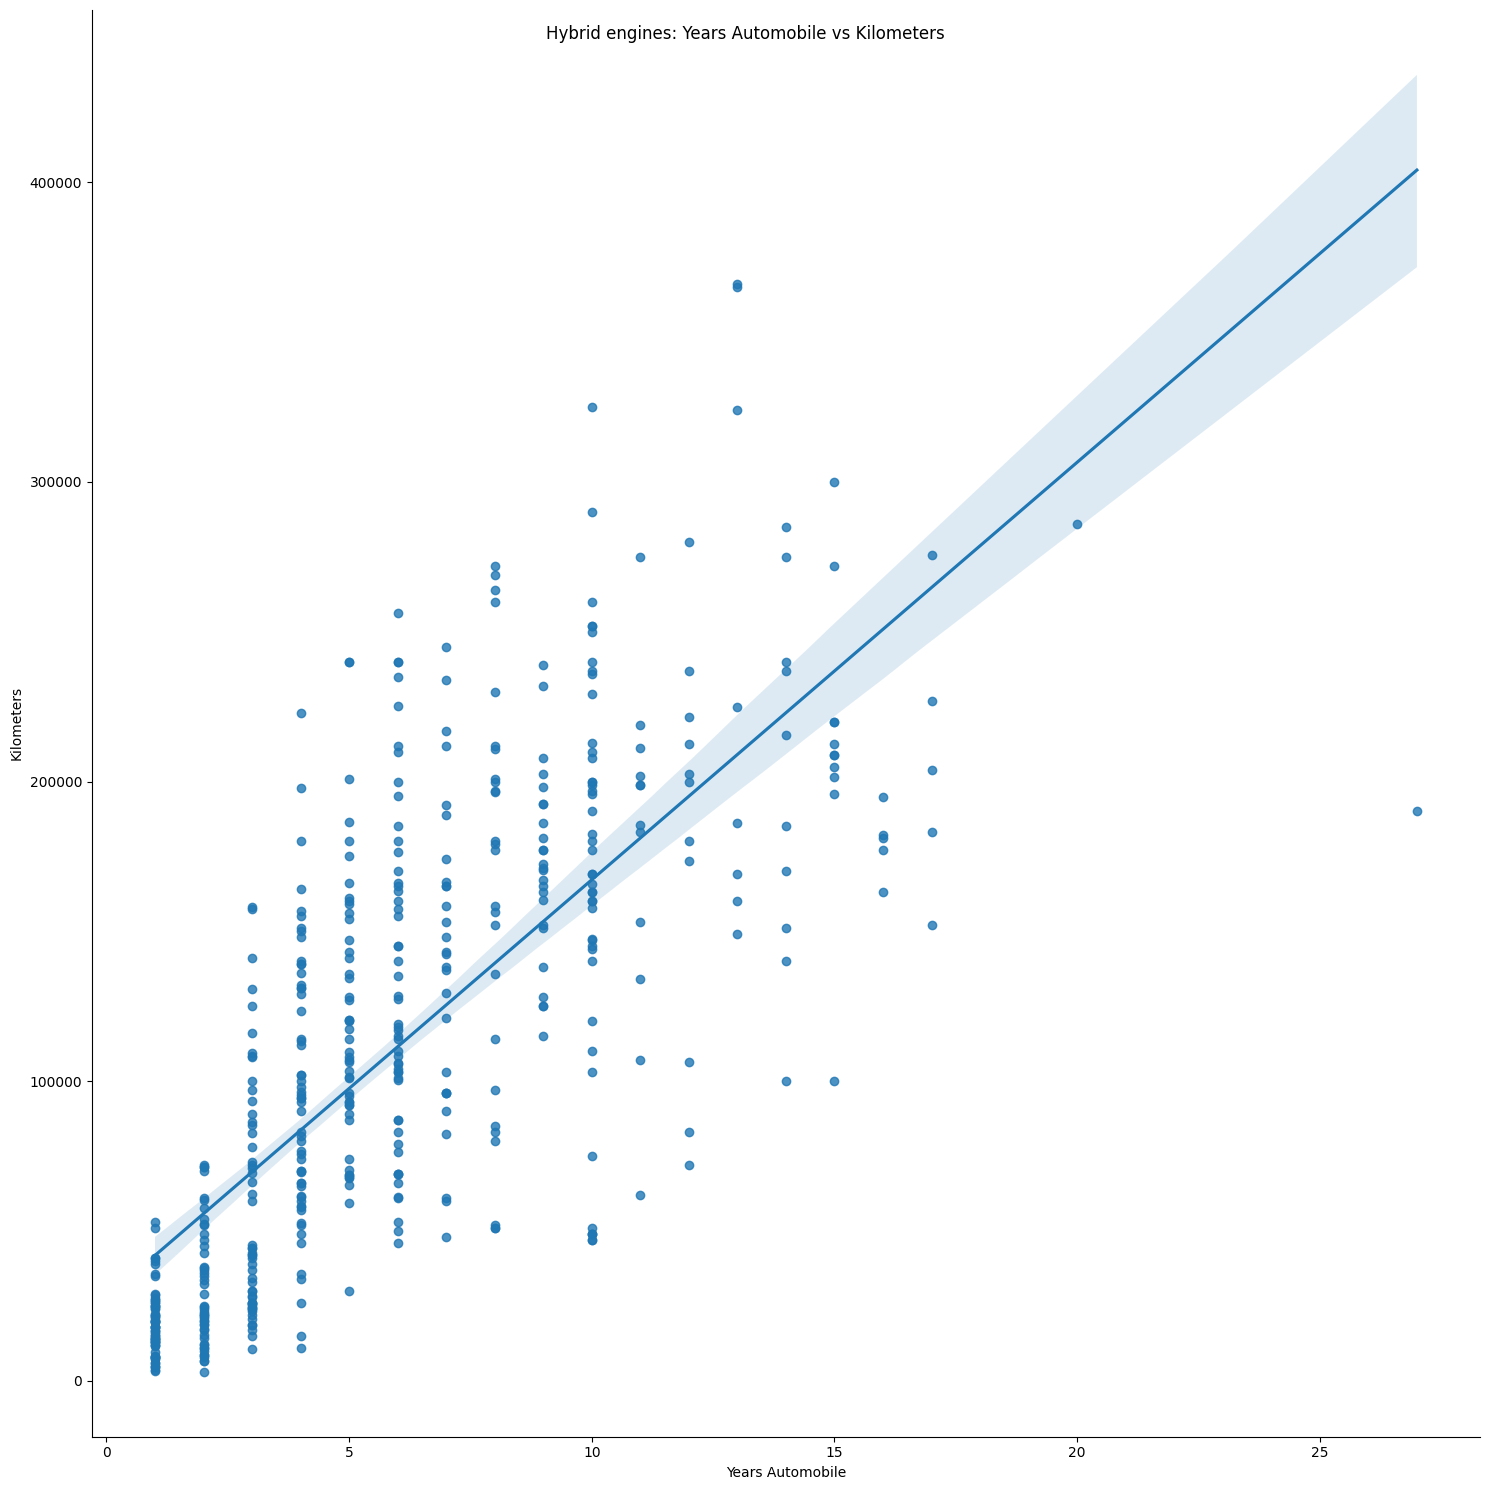

In [141]:
df_no_nulls_hybrid = df_hybrid[["Years Automobile", "Price BGN", "Kilometers", "Horsepower"]].dropna()
g = sns.lmplot(x = "Years Automobile", y = "Kilometers", data = df_no_nulls_hybrid, height=15, aspect=1)
g.fig.suptitle('Hybrid engines: Years Automobile vs Kilometers')
plt.show()

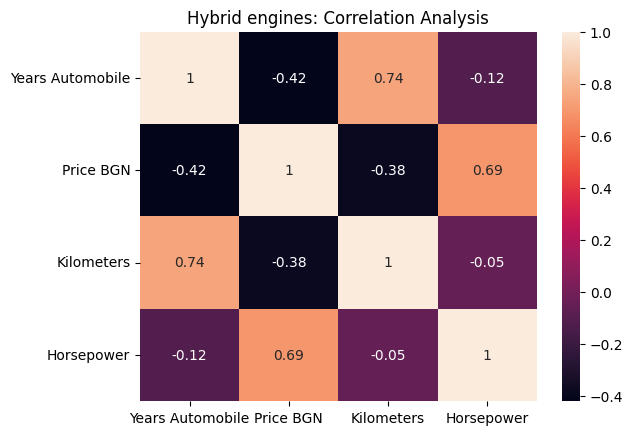

In [140]:
g = sns.heatmap(np.round(df_no_nulls_hybrid.corr(), 2), annot = True).set(title='Hybrid engines: Correlation Analysis')
g
plt.show()

The correlation between Years Automobile and Kilometers is the most expressed in this group - strong positive (0.74).
This means that as the age of the car increases, so do its kilometers. 

## What are the characteristics of the top 20% most expensive cars from the all groups?

In [142]:
df_diesel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21224 entries, 0 to 21223
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Model             21224 non-null  object  
 1   Year Manifacture  21224 non-null  int64   
 2   Years Automobile  21224 non-null  int64   
 3   Price BGN         21106 non-null  float64 
 4   Kilometers        21224 non-null  int64   
 5   Engine Type       21224 non-null  object  
 6   Horsepower        20200 non-null  float64 
 7   bins              21106 non-null  category
 8   bins_km           21156 non-null  category
 9   bins_years        21224 non-null  category
dtypes: category(3), float64(2), int64(3), object(2)
memory usage: 1.2+ MB


In [143]:
most_expensive_diesel = df_diesel.nlargest(4245, 'Price BGN')
most_expensive_diesel.head()

,Model,Year Manifacture,Years Automobile,Price BGN,Kilometers,Engine Type,Horsepower,bins,bins_km,bins_years
9815,Mercedes-Benz G 400 d Stronger Then Time,2019,3,327210.00,29500,Дизел,330.0,"(20000, 2000000]","(0, 50000]","(0, 5]"
10412,Mercedes-Benz S 400 S400d Long 4Matic AMG Line...,2021,1,316999.00,28793,Дизел,330.0,"(20000, 2000000]","(0, 50000]","(0, 5]"
9754,Mercedes-Benz G 350 CABRIO AMG DESIGNO,2009,13,292500.00,121000,Дизел,211.0,"(20000, 2000000]","(100000, 150000]","(10, 15]"
10283,Mercedes-Benz S 400 d 4MATIC,2021,1,272998.05,39000,Дизел,330.0,"(20000, 2000000]","(0, 50000]","(0, 5]"
10281,Mercedes-Benz S 400 D 4MATIC AMG LONG,2021,1,237900.00,31000,Дизел,330.0,"(20000, 2000000]","(0, 50000]","(0, 5]"


In [172]:
min_price = most_expensive_diesel['Price BGN'].min()
print(f"The Minimum price of the most expensive diesel cars is: {min_price}lv.")

The Minimum price of the most expensive diesel cars is: 21999.0lv.


In [173]:
max_price = most_expensive_diesel['Price BGN'].max()
print(f"The Maximum price of the most expensive diesel cars is: {max_price}lv.")

The Maximum price of the most expensive diesel cars is: 327210.0lv.


In [174]:
mean = most_expensive_diesel['Price BGN'].mean()
print(f"The average price of the most expensive diesel cars is: {mean}lv.")

The average price of the most expensive diesel cars is: 43424.00189634865lv.


In [175]:
median = most_expensive_diesel['Price BGN'].median()
print(f"The median price of the most expensive diesel cars is: {median}lv.")

The median price of the most expensive diesel cars is: 33500.0lv.


In [183]:
mode = most_expensive_diesel['Price BGN'].mode()
print(f"The mode price of the most expensive diesel cars is:{mode}lv.")

The mode price of the most expensive diesel cars is:0    23500.0
Name: Price BGN, dtype: float64lv.


In [163]:
most_expensive_diesel.mode()

,Model,Year Manifacture,Years Automobile,Price BGN,Kilometers,Engine Type,Horsepower,bins,bins_km,bins_years
0,Land Rover Range Rover Sport,2016,6,23500.0,200000,Дизел,150.0,"(20000, 2000000]","(150000, 200000]","(5, 10]"


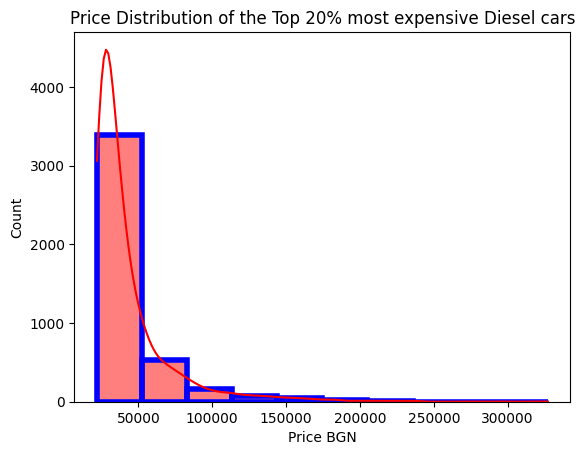

In [191]:
sns.histplot(data=most_expensive_diesel, x = 'Price BGN', bins = 10, color = 'red', edgecolor = 'blue', linewidth = 4, kde = True)
plt.title("Price Distribution of the Top 20% most expensive Diesel cars")
plt.show()

The most of the top 20% most expensive diesel cars are under 50 000lv.

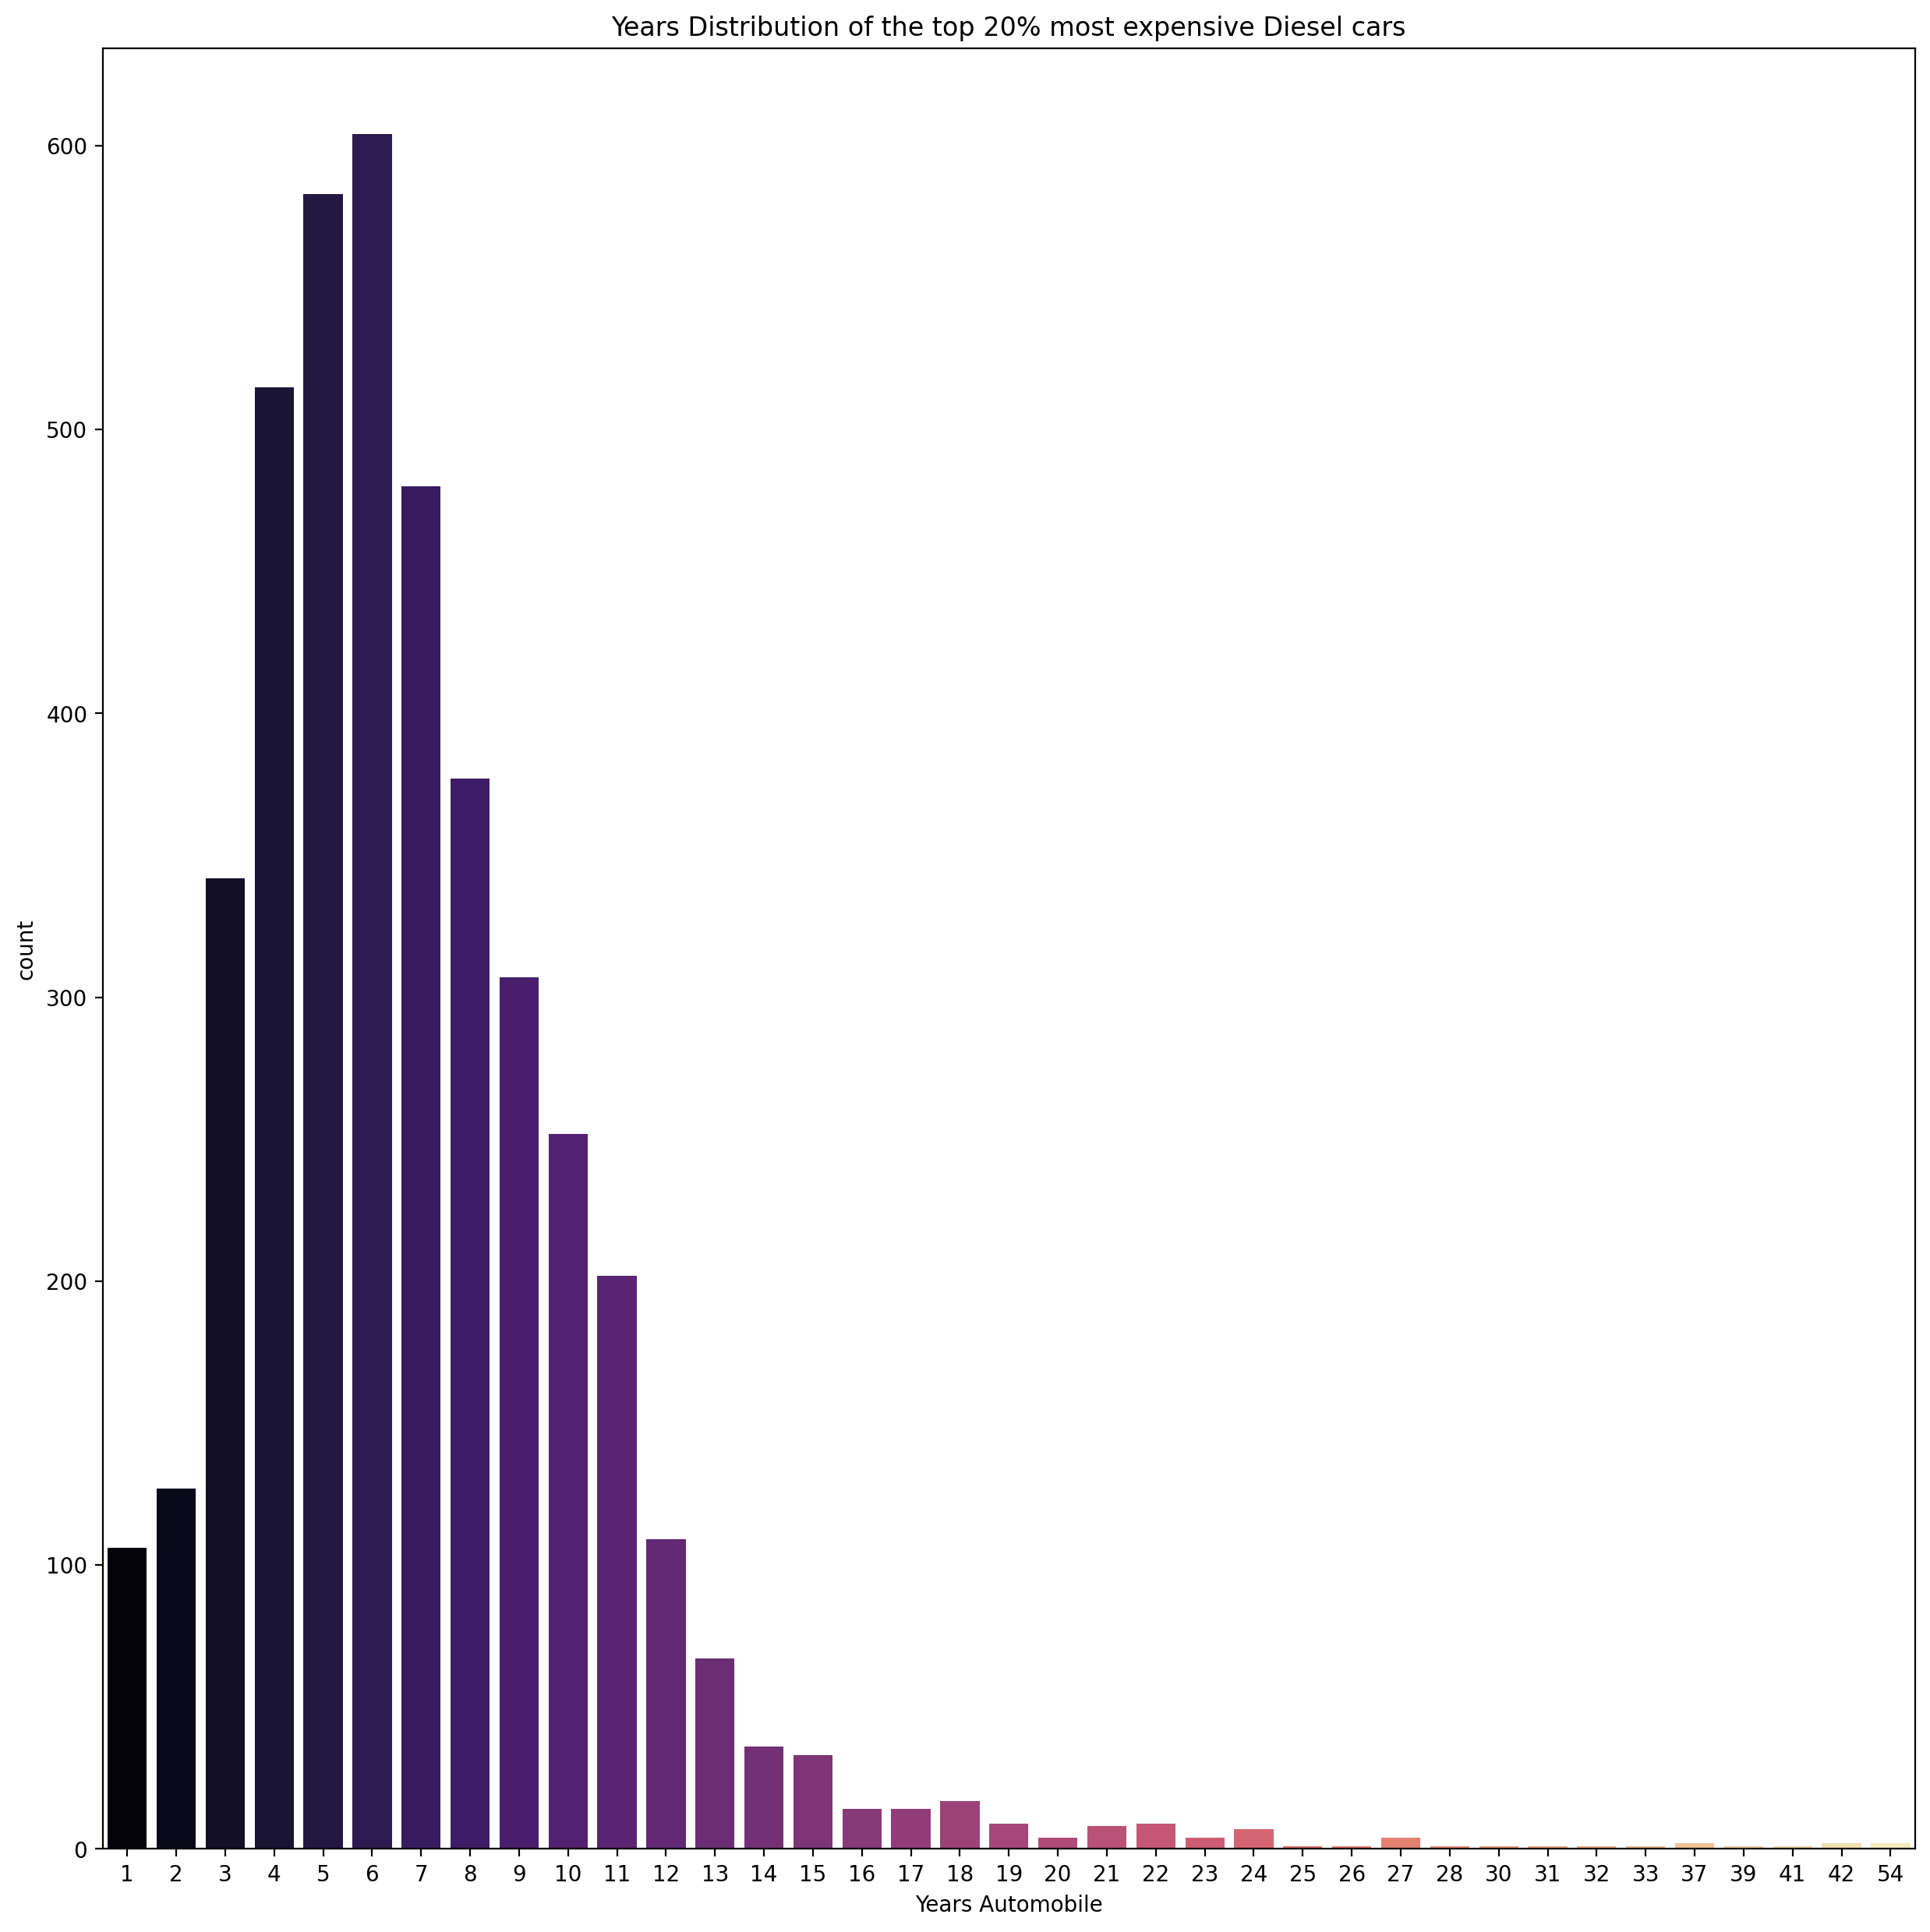

In [201]:
plt.figure(figsize=(15,15), dpi = 200)
sns.countplot(data = most_expensive_diesel, x = 'Years Automobile', palette = 'magma' )
plt.title('Years Distribution of the top 20% most expensive Diesel cars')
plt.show()

The Top 20% of the most expensive Diesel cars are between 1 and 24 years, most af them are between 4 and 8 years.

In [145]:
df_gasoline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15903 entries, 0 to 15902
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Model             15903 non-null  object  
 1   Year Manifacture  15903 non-null  int64   
 2   Years Automobile  15903 non-null  int64   
 3   Price BGN         15764 non-null  float64 
 4   Kilometers        15903 non-null  int64   
 5   Engine Type       15903 non-null  object  
 6   Horsepower        14845 non-null  float64 
 7   bins              15811 non-null  category
 8   bins_km           15844 non-null  category
 9   bins_years        15903 non-null  category
dtypes: category(3), float64(2), int64(3), object(2)
memory usage: 917.1+ KB


In [146]:
most_expensive_gasoline = df_gasoline.nlargest(3181, 'Price BGN')
most_expensive_gasoline.head()

,Model,Year Manifacture,Years Automobile,Price BGN,Kilometers,Engine Type,Horsepower,bins,bins_km,bins_years
536,Alfa Romeo 156 7,2021,1,1055554.5,6666666,Бензин,7.0,"(0, 5000]",NaN,"(0, 5]"
2579,Ferrari F430 SCUDERIA | NOVITEC RОSSO,2009,13,828750.0,22800,Бензин,717.0,"(10000, 15000]","(0.0, 50000.0]","(10, 15]"
12280,Rolls-Royce Phantom Starlight,2018,4,780000.0,17000,Бензин,563.0,"(5000, 10000]","(0.0, 50000.0]","(0, 5]"
12274,Rolls-Royce Ghost EXTENDED/ STARLIGHT/ BESPOKE...,2020,2,731211.0,11500,Бензин,571.0,"(20000, 20000000]","(0.0, 50000.0]","(0, 5]"
6842,Lamborghini Huracan STO =Nero Noctis= Full Car...,2021,1,727500.0,6000,Бензин,640.0,"(20000, 20000000]","(0.0, 50000.0]","(0, 5]"


In [177]:
min_price = most_expensive_gasoline['Price BGN'].min()
print(f"The Minimum price of the most expensive gasoline cars is: {min_price}lv.")

The Minimum price of the most expensive gasoline cars is: 25350.0lv.


In [178]:
max_price = most_expensive_gasoline['Price BGN'].max()
print(f"The Maximum price of the most expensive gasoline cars is: {max_price}lv.")

The Maximum price of the most expensive gasoline cars is: 1055554.5lv.


In [179]:
mean = most_expensive_gasoline['Price BGN'].mean()
print(f"The average price of the most expensive gasoline cars is: {mean}lv.")

The average price of the most expensive gasoline cars is: 84285.81021691291lv.


In [180]:
median = most_expensive_gasoline['Price BGN'].median()
print(f"The median price of the most expensive gasoline cars is: {median}lv.")

The median price of the most expensive gasoline cars is: 45555.0lv.


In [184]:
mode = most_expensive_gasoline['Price BGN'].mode()
print(f"The mode price of the most expensive gasoline cars is:{mode}lv.")

The mode price of the most expensive gasoline cars is:0    32000.0
Name: Price BGN, dtype: float64lv.


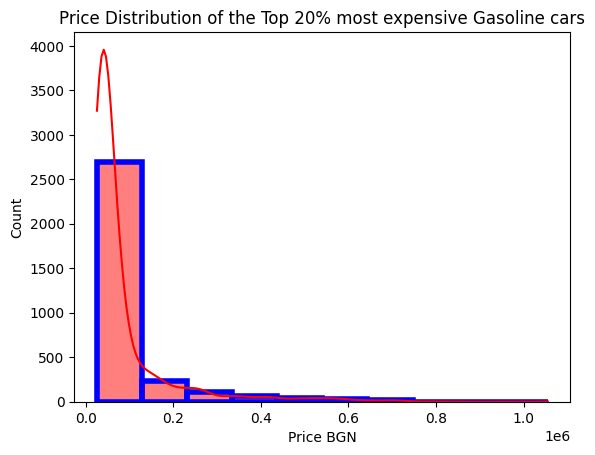

In [204]:
sns.histplot(data=most_expensive_gasoline, x = 'Price BGN', bins = 10, color = 'red', edgecolor = 'blue', linewidth = 4, kde = True)
plt.title("Price Distribution of the Top 20% most expensive Gasoline cars")
plt.show()

The most of the top 20% most expensive gasoline cars are under 200 000lv.

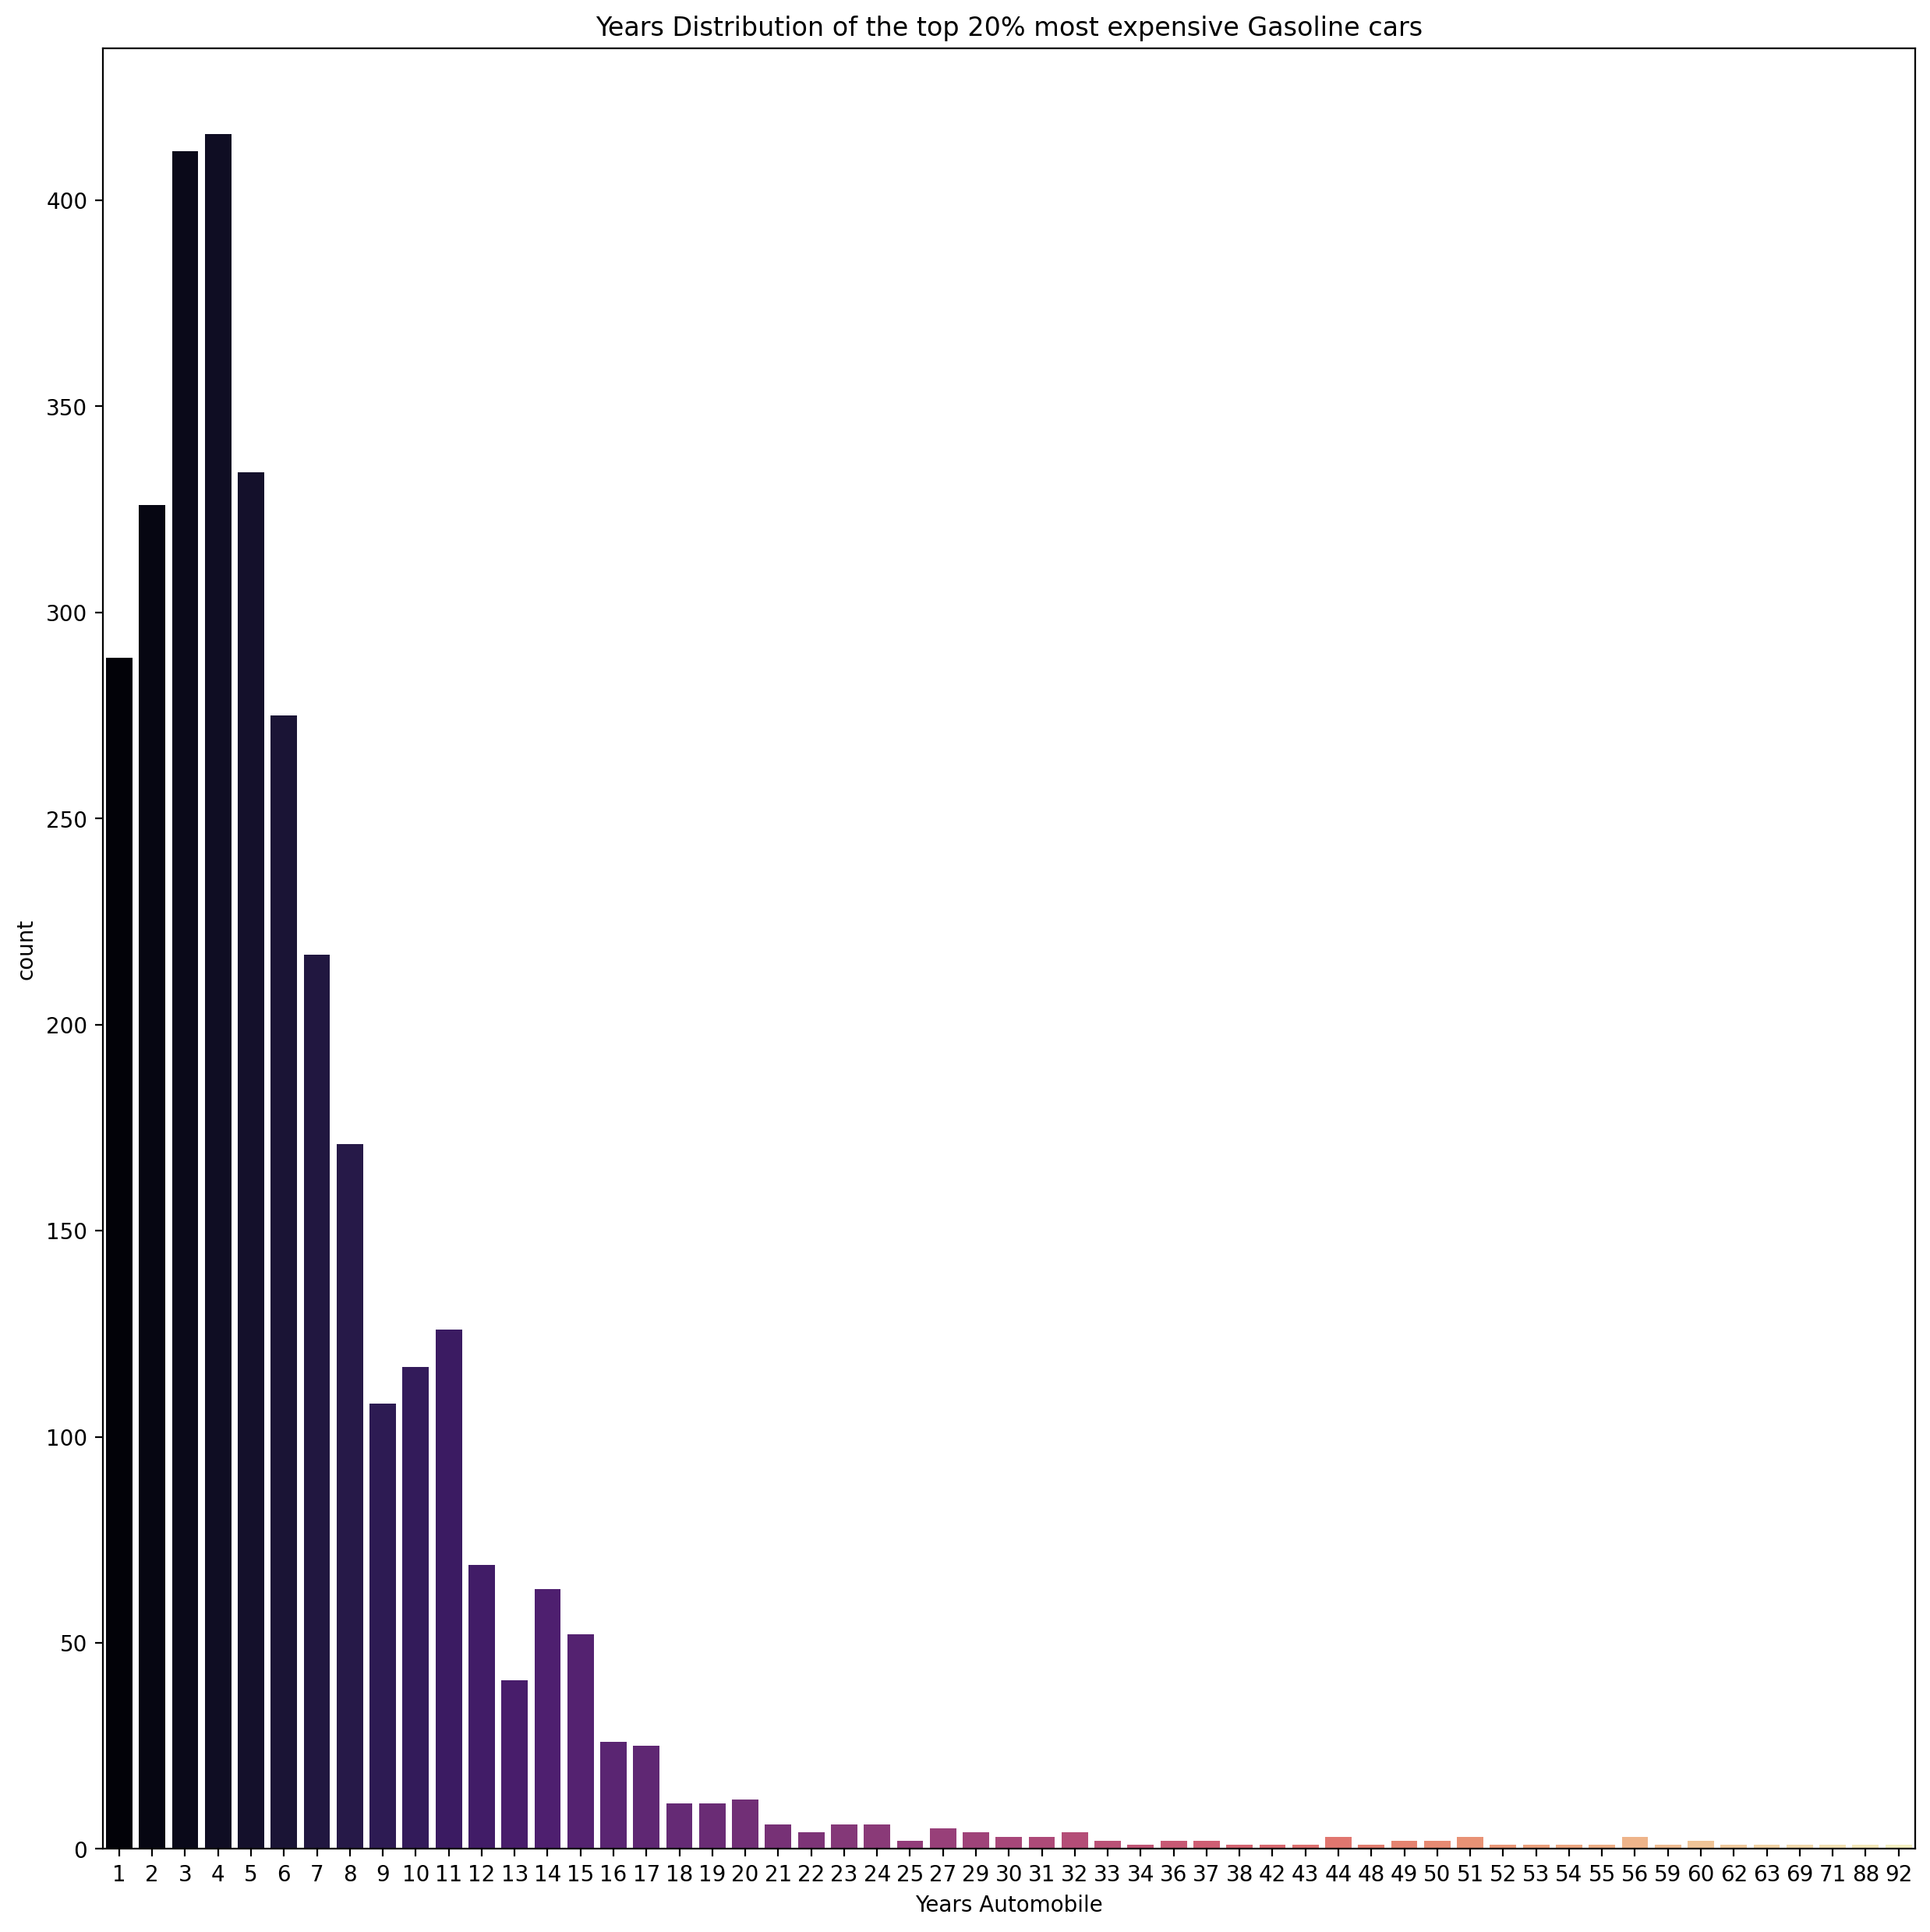

In [202]:
plt.figure(figsize=(15,15), dpi = 200)
sns.countplot(data = most_expensive_gasoline, x = 'Years Automobile', palette = 'magma' )
plt.title('Years Distribution of the top 20% most expensive Gasoline cars')
plt.show()

The Top 20% of the most expensive Gasoline cars are between 1 and 7 years, but most af them are 3 or 4 years.

In [148]:
df_electric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Model             470 non-null    object  
 1   Year Manifacture  470 non-null    int64   
 2   Years Automobile  470 non-null    int64   
 3   Price BGN         465 non-null    float64 
 4   Kilometers        470 non-null    int64   
 5   Engine Type       470 non-null    object  
 6   Horsepower        452 non-null    float64 
 7   bins              469 non-null    category
 8   bins_km           470 non-null    category
 9   bins_years        470 non-null    category
dtypes: category(3), float64(2), int64(3), object(2)
memory usage: 27.9+ KB


In [151]:
most_expensive_electric = df_electric.nlargest(94, 'Price BGN')
most_expensive_electric.head()

,Model,Year Manifacture,Years Automobile,Price BGN,Kilometers,Engine Type,Horsepower,bins,bins_km,bins_years
190,Porsche Taycan Turbo S =Ceramic Brakes= Night ...,2021,1,316200.00,10000,Електрически,761.0,"(15000, 20000]","(0, 50000]","(0, 5]"
203,Porsche Taycan TURBO S/PANORAMA/CARBON/CERAMIC,2020,2,292461.00,8000,Електрически,761.0,"(5000, 10000]","(0, 50000]","(0, 5]"
193,Porsche Taycan TURBO/ LIFT/ BOSE/ SPORT CHRONO...,2021,1,287976.00,3500,Електрически,625.0,"(20000, 2000000]","(0, 50000]","(0, 5]"
200,Porsche Taycan TURBO/ BURMESTER/ PANO/ SPORT C...,2021,1,282321.00,18000,Електрически,625.0,"(20000, 2000000]","(0, 50000]","(0, 5]"
204,Porsche Taycan Turbo S,2020,2,278848.05,21000,Електрически,761.0,"(20000, 2000000]","(0, 50000]","(0, 5]"


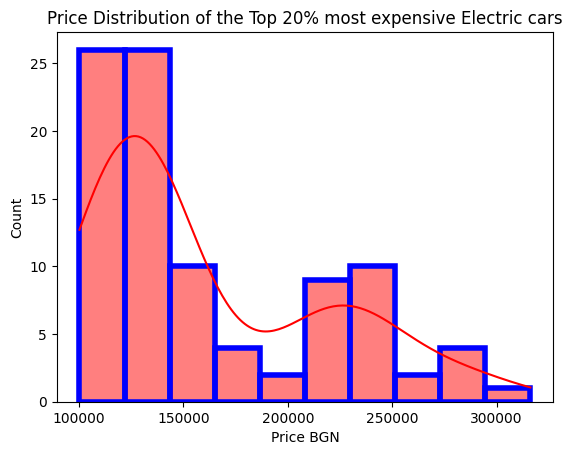

In [203]:
sns.histplot(data=most_expensive_electric, x = 'Price BGN', bins = 10, color = 'red', edgecolor = 'blue', linewidth = 4, kde = True)
plt.title("Price Distribution of the Top 20% most expensive Electric cars")
plt.show()

There are two peaks: between 100 000lv and 150 000lv (most of the cars) and between 200 000lv and 250 000lv.

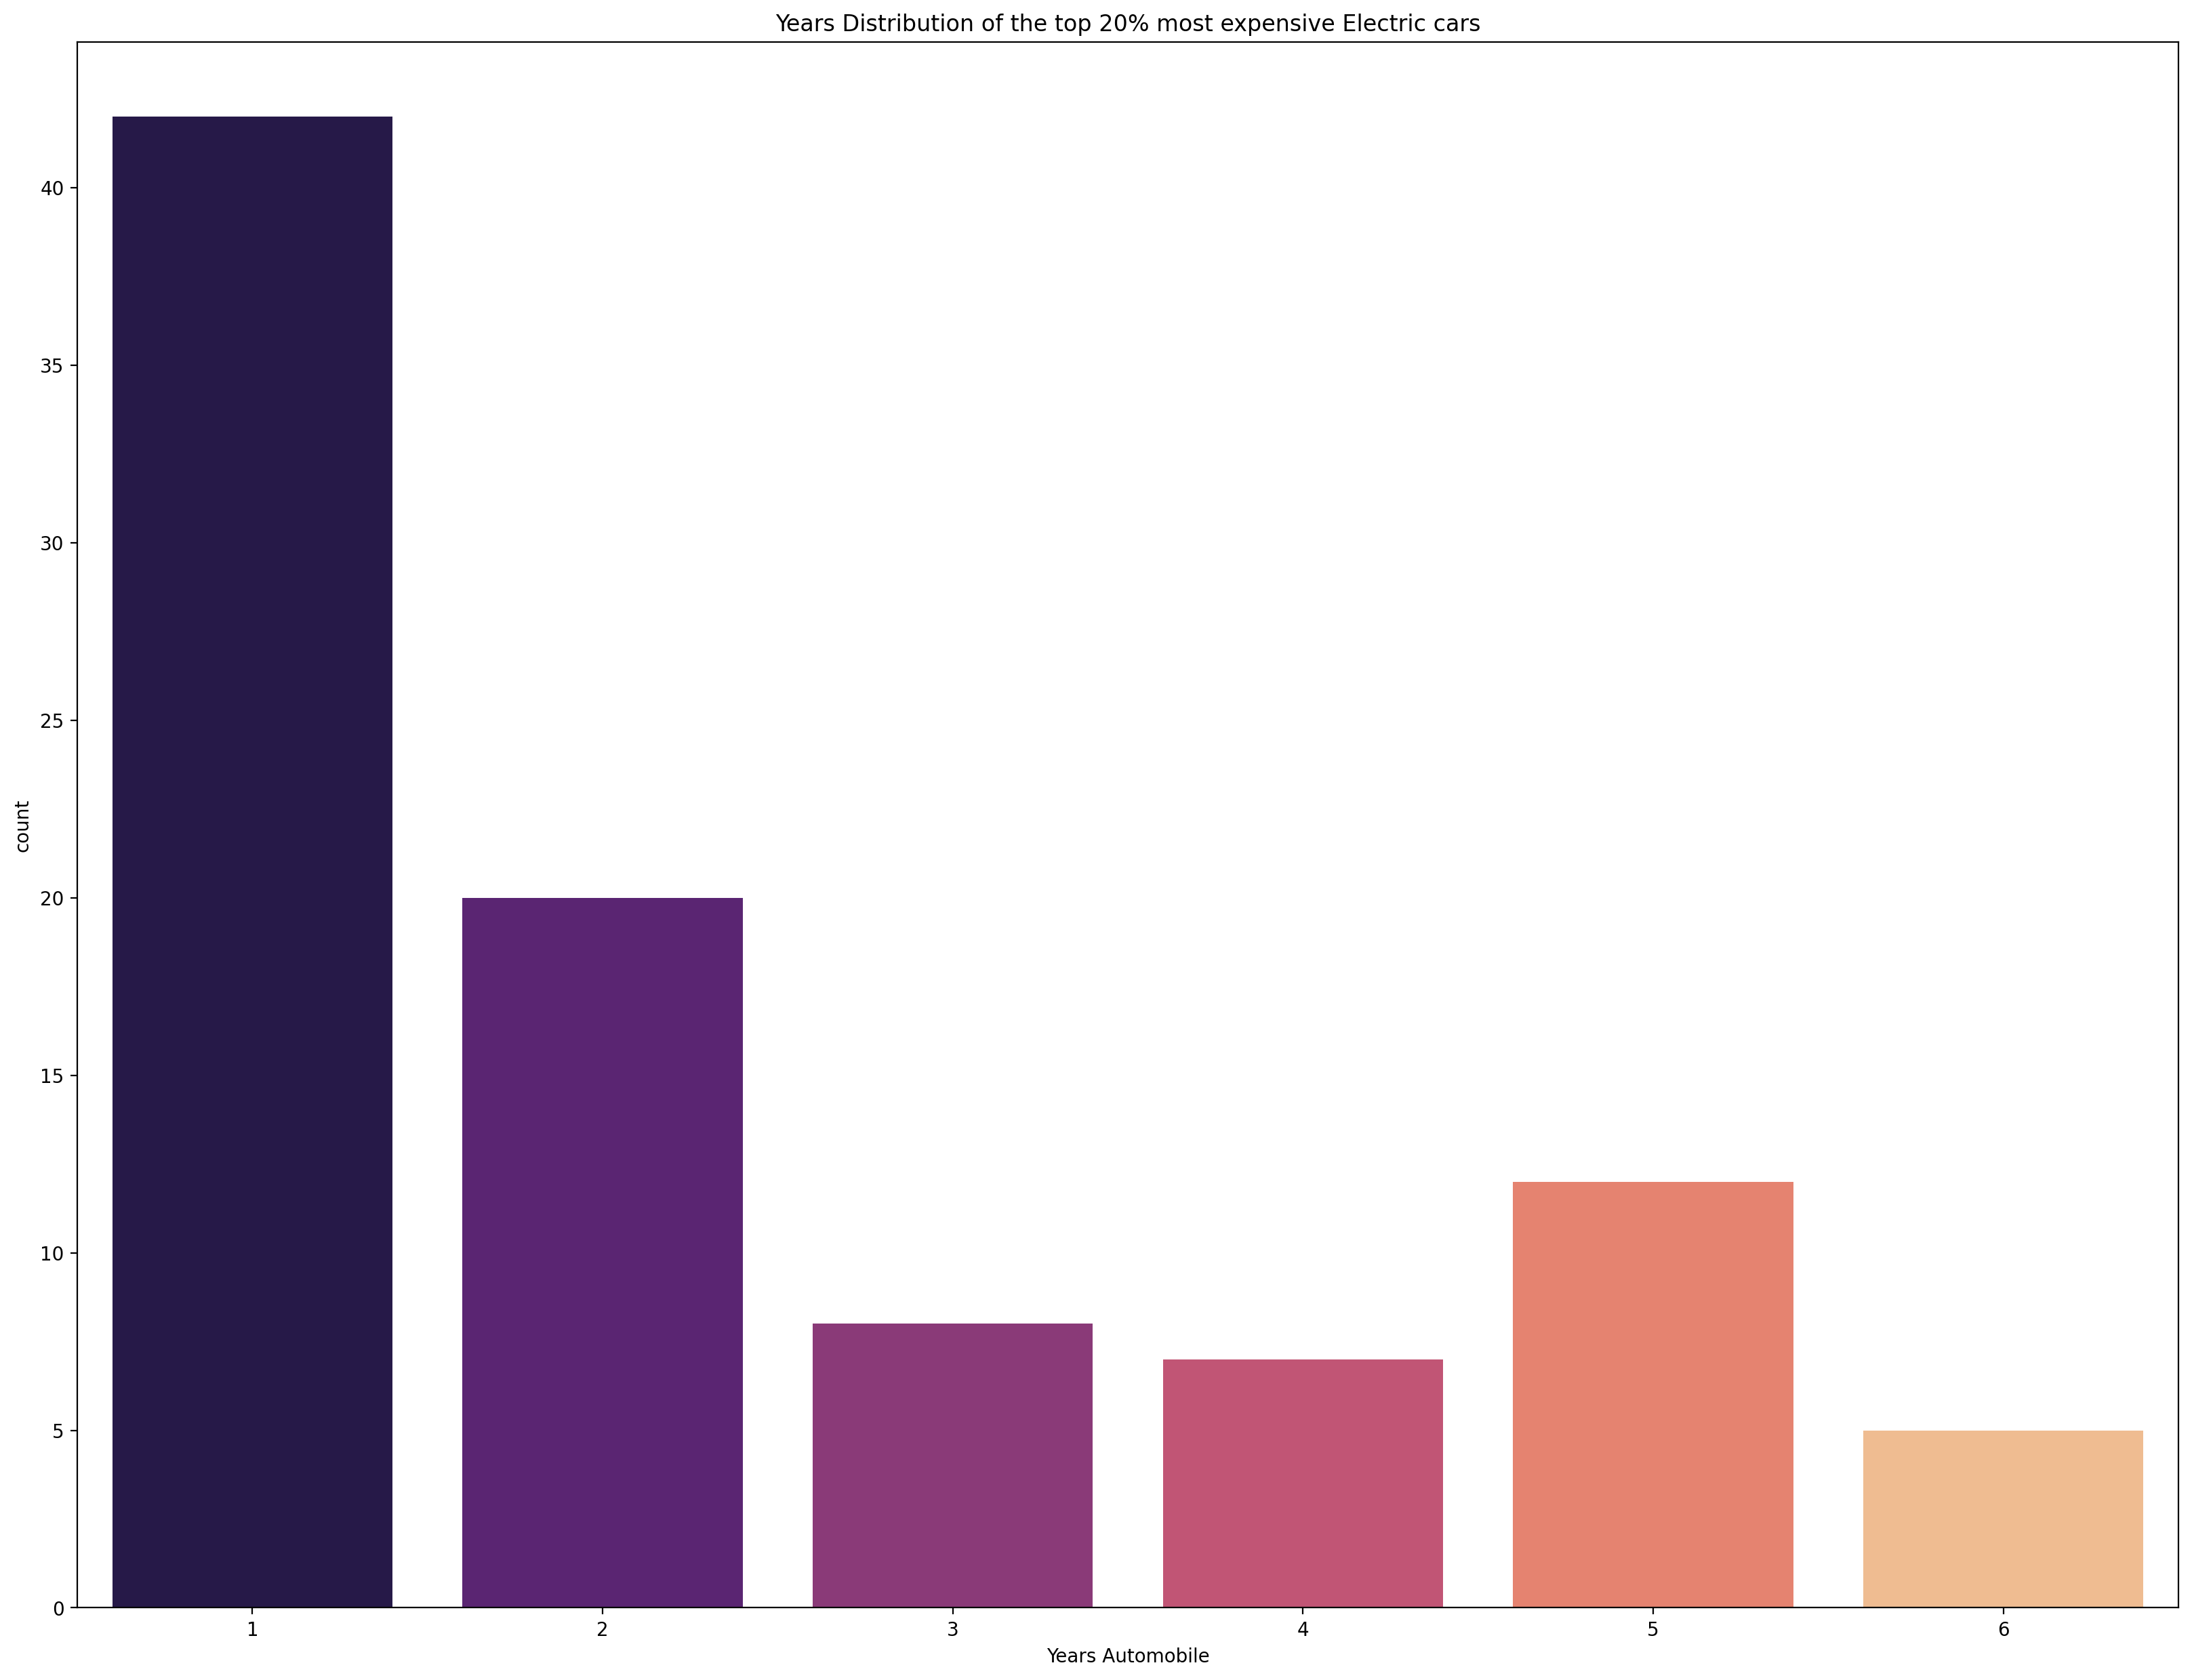

In [152]:
plt.figure(figsize=(20,15), dpi = 200)
sns.countplot(data = most_expensive_electric, x = 'Years Automobile', palette = 'magma' )
plt.title('Years Distribution of the top 20% most expensive Electric cars')
plt.show()

The top 20% of the most cars with Electric engines are between 1 and 6 years, but most of them are 1 or 2 years.

In [153]:
df_hybrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536 entries, 0 to 535
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Model             536 non-null    object  
 1   Year Manifacture  536 non-null    int64   
 2   Years Automobile  536 non-null    int64   
 3   Price BGN         534 non-null    float64 
 4   Kilometers        536 non-null    int64   
 5   Engine Type       536 non-null    object  
 6   Horsepower        517 non-null    float64 
 7   bins              534 non-null    category
 8   bins_km           536 non-null    category
 9   bins_years        536 non-null    category
dtypes: category(3), float64(2), int64(3), object(2)
memory usage: 31.8+ KB


In [154]:
most_expensive_hybrid = df_electric.nlargest(108, 'Price BGN')
most_expensive_hybrid.head()

,Model,Year Manifacture,Years Automobile,Price BGN,Kilometers,Engine Type,Horsepower,bins,bins_km,bins_years
190,Porsche Taycan Turbo S =Ceramic Brakes= Night ...,2021,1,316200.00,10000,Електрически,761.0,"(15000, 20000]","(0, 50000]","(0, 5]"
203,Porsche Taycan TURBO S/PANORAMA/CARBON/CERAMIC,2020,2,292461.00,8000,Електрически,761.0,"(5000, 10000]","(0, 50000]","(0, 5]"
193,Porsche Taycan TURBO/ LIFT/ BOSE/ SPORT CHRONO...,2021,1,287976.00,3500,Електрически,625.0,"(20000, 2000000]","(0, 50000]","(0, 5]"
200,Porsche Taycan TURBO/ BURMESTER/ PANO/ SPORT C...,2021,1,282321.00,18000,Електрически,625.0,"(20000, 2000000]","(0, 50000]","(0, 5]"
204,Porsche Taycan Turbo S,2020,2,278848.05,21000,Електрически,761.0,"(20000, 2000000]","(0, 50000]","(0, 5]"


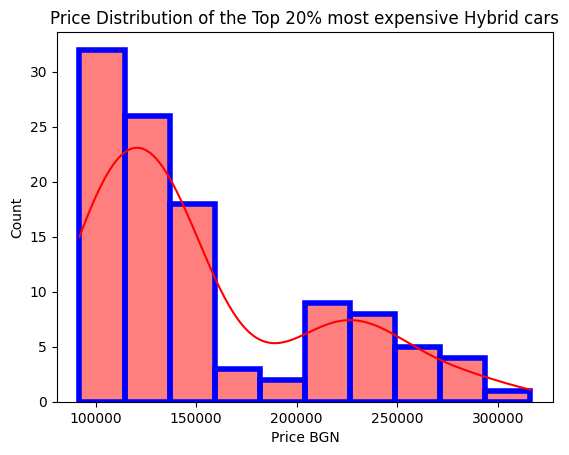

In [206]:
sns.histplot(data=most_expensive_hybrid, x = 'Price BGN', bins = 10, color = 'red', edgecolor = 'blue', linewidth = 4, kde = True)
plt.title("Price Distribution of the Top 20% most expensive Hybrid cars")
plt.show()

In [ ]:
There are two peaks: between 90 000lv and 150 000lv and between 200 000lv and 250 000lv.

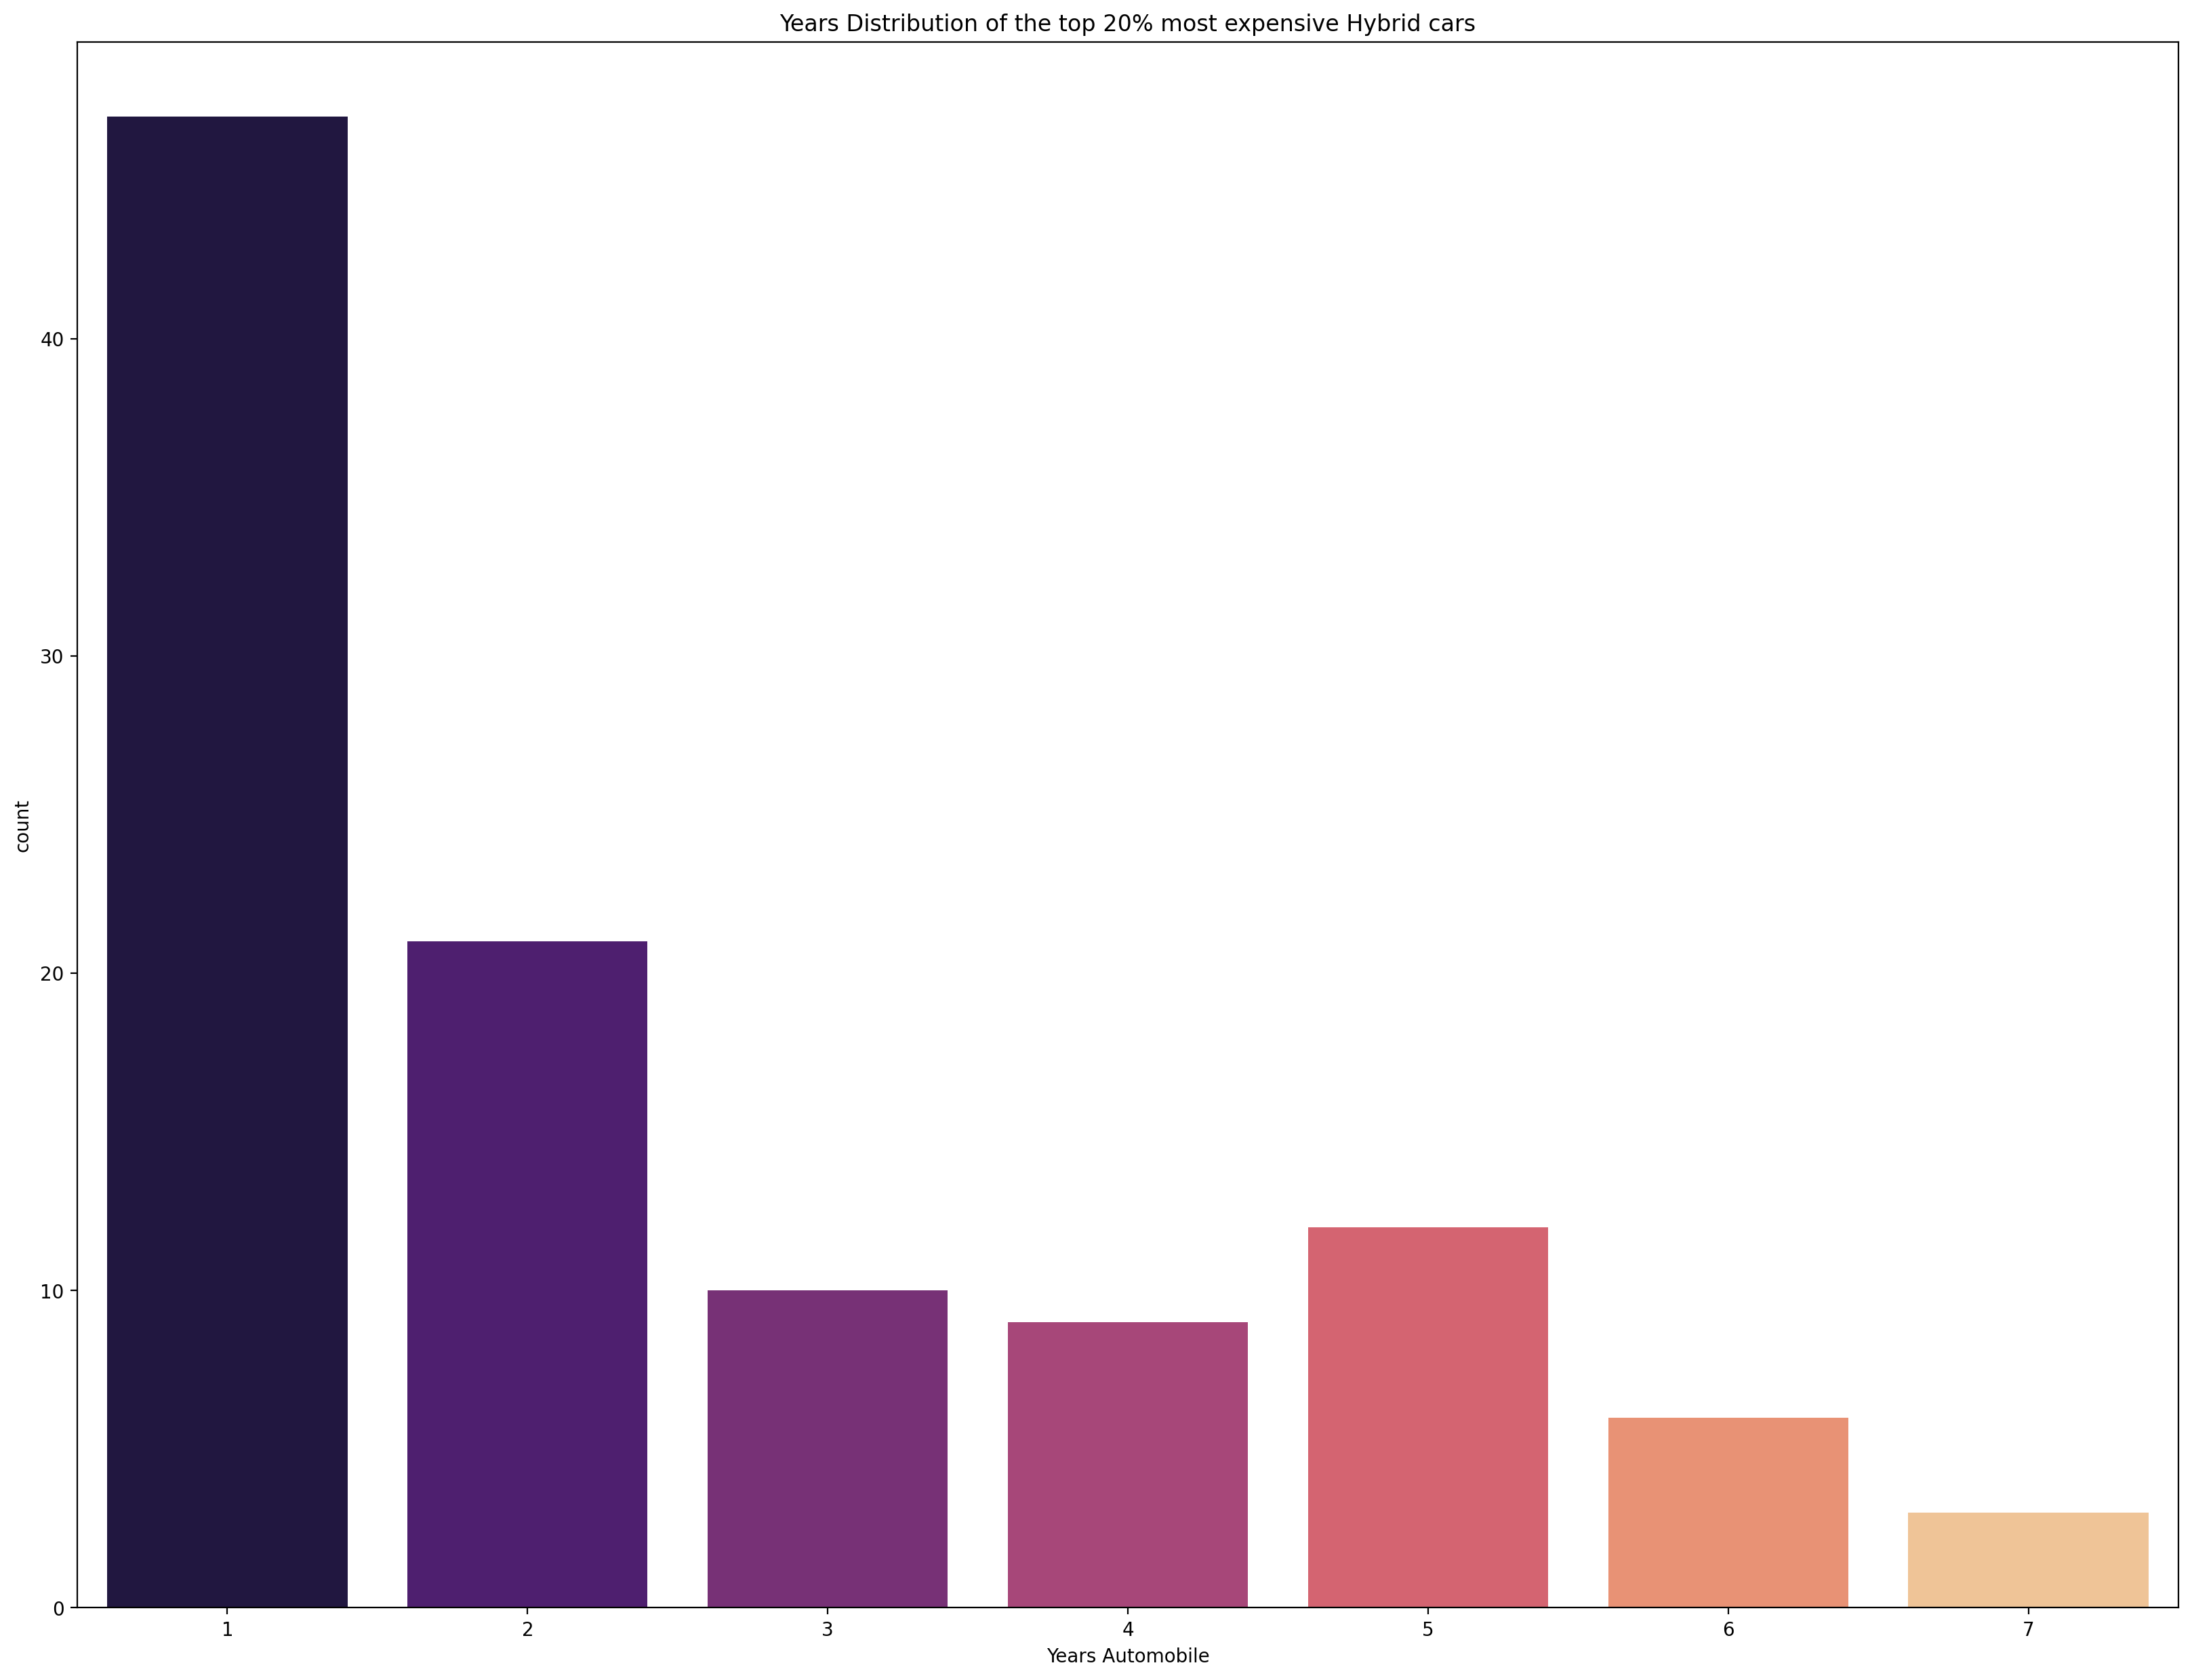

In [205]:
plt.figure(figsize=(20,15), dpi = 200)
sns.countplot(data = most_expensive_hybrid, x = 'Years Automobile', palette = 'magma' )
plt.title('Years Distribution of the top 20% most expensive Hybrid cars')
plt.show()

The most of the cars with Hybrid engines are 1 or 2 years.

Conclusion: most of the cars in Bulgaria are old (over 10 years), with many kilometers (over 150,000) and expensive..